## 1. Import libraries

# Implementing K-Means Clustering with NBA Shooting Data

In [1484]:
from bs4 import BeautifulSoup, Comment
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns
import sklearn
from urllib.request import urlopen

## 2. Scrape data for shooting percentages of all NBA players

In [1485]:
import requests
URL = "https://www.basketball-reference.com/leagues/NBA_2022_shooting.html"
r = requests.get(URL)

In [1486]:
html = urlopen(URL)
soup = BeautifulSoup(html, features="lxml")

In [1487]:
headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]
headers

['Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'FG%',
 'Dist.',
 '\xa0',
 '2P',
 '0-3',
 '3-10',
 '10-16',
 '16-3P',
 '3P',
 '\xa0',
 '2P',
 '0-3',
 '3-10',
 '10-16',
 '16-3P',
 '3P',
 '\xa0',
 '2P',
 '3P',
 '\xa0',
 '%FGA',
 '#',
 '\xa0',
 '%3PA',
 '3P%',
 '\xa0',
 'Att.',
 '#']

In [1488]:
rows = soup.findAll('tr')[2:]
rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
rank = 1
for i in range(0, len(rows_data)):
    rows_data[i].insert(0, rank)
    rank +=1
    
print(rows_data)

[[1, 'Precious Achiuwa', 'C', '22', 'TOR', '73', '1725', '.439', '10.2', '', '.741', '.348', '.274', '.085', '.035', '.259', '', '.468', '.614', '.345', '.373', '.190', '.359', '', '.598', '.964', '', '.143', '67', '', '.429', '.313', '', '0', '0'], [2, 'Steven Adams', 'C', '28', 'MEM', '76', '1999', '.547', '2.9', '', '.997', '.693', '.260', '.042', '.003', '.003', '', '.548', '.632', '.350', '.438', '.000', '.000', '', '.490', '', '', '.143', '48', '', '.000', '', '', '1', '0'], [3, 'Bam Adebayo', 'C', '24', 'MIA', '56', '1825', '.557', '7.0', '', '.992', '.395', '.309', '.200', '.088', '.008', '', '.562', '.771', '.467', '.404', '.313', '.000', '', '.608', '', '', '.181', '119', '', '.000', '', '', '2', '0'], [4, 'Santi Aldama', 'PF', '21', 'MEM', '32', '360', '.402', '12.0', '', '.636', '.333', '.205', '.091', '.008', '.364', '', '.560', '.682', '.444', '.417', '.000', '.125', '', '.638', '1.000', '', '.076', '10', '', '.229', '.364', '', '0', '0'], [5, 'LaMarcus Aldridge', 'C', '3

## 3. Data wrangling and cleaning

### 3.1 Convert scraped data to Pandas Dataframe

In [1489]:
df = pd.DataFrame(rows_data, columns = headers)
df=df[df['Player'].notnull()]
df.head(20)

,Rk,Player,Pos,Age,Tm,G,MP,FG%,Dist.,,...,3P,,%FGA,#,,%3PA,3P%,,Att.,#
0,1,Precious Achiuwa,C,22,TOR,73,1725,.439,10.2,,...,.964,,.143,67,,.429,.313,,0,0
1,2,Steven Adams,C,28,MEM,76,1999,.547,2.9,,...,,,.143,48,,.000,,,1,0
2,3,Bam Adebayo,C,24,MIA,56,1825,.557,7.0,,...,,,.181,119,,.000,,,2,0
3,4,Santi Aldama,PF,21,MEM,32,360,.402,12.0,,...,1.000,,.076,10,,.229,.364,,0,0
4,5,LaMarcus Aldridge,C,36,BRK,47,1050,.550,12.3,,...,1.000,,.039,18,,.283,.308,,0,0
5,6,Nickeil Alexander-Walker,SG,23,TOT,65,1466,.372,15.8,,...,.876,,.015,8,,.240,.370,,2,0
6,7,Nickeil Alexander-Walker,SG,23,NOP,50,1317,.375,15.6,,...,.895,,.014,8,,.230,.371,,2,0
7,8,Nickeil Alexander-Walker,SG,23,UTA,15,149,.333,18.4,,...,.700,,.021,0,,.333,.364,,0,0
8,9,Grayson Allen,SG,26,MIL,66,1805,.448,19.2,,...,.912,,.023,10,,.260,.455,,0,0
9,10,Jarrett Allen,C,23,CLE,56,1809,.677,3.8,,...,.000,,.343,164,,.600,.000,,0,0


### 3.2 Rename columns

In [1490]:
df.columns = ["ID", "Player", "Pos", "Age", "Team", "GP", "MP", "FGPct", "FGDist", "", "2PAPct", "0-3APct", "3-10APct", 
           "10-16APct", "16-3PAPct", "3PAPct", "", "2PPct", "0-3Pct", "3-10Pct", "10-16Pct", "16-3PPct", "3PPct", "",
           "Pct2PAst", "Pct3PAst", "", "DunkPct", "Dunks", "", "Corner3APct", "Corner3Pct", "", "HeaveAttempts", "Heaves"]
df

,ID,Player,Pos,Age,Team,GP,MP,FGPct,FGDist,,...,Pct3PAst,,DunkPct,Dunks,,Corner3APct,Corner3Pct,,HeaveAttempts,Heaves
0,1,Precious Achiuwa,C,22,TOR,73,1725,.439,10.2,,...,.964,,.143,67,,.429,.313,,0,0
1,2,Steven Adams,C,28,MEM,76,1999,.547,2.9,,...,,,.143,48,,.000,,,1,0
2,3,Bam Adebayo,C,24,MIA,56,1825,.557,7.0,,...,,,.181,119,,.000,,,2,0
3,4,Santi Aldama,PF,21,MEM,32,360,.402,12.0,,...,1.000,,.076,10,,.229,.364,,0,0
4,5,LaMarcus Aldridge,C,36,BRK,47,1050,.550,12.3,,...,1.000,,.039,18,,.283,.308,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,838,Thaddeus Young,PF,33,TOR,26,475,.465,10.1,,...,1.000,,.035,4,,.651,.500,,0,0
838,839,Trae Young,PG,23,ATL,76,2652,.460,16.5,,...,.223,,.000,0,,.048,.552,,1,0
839,840,Omer Yurtseven,C,23,MIA,56,706,.526,5.8,,...,1.000,,.178,39,,.182,.000,,0,0
840,841,Cody Zeller,C,29,POR,27,355,.567,3.7,,...,,,.211,16,,.250,.000,,0,0


In [1491]:
del df["ID"]

In [1492]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(how='all', axis=1, inplace=True)
df.dtypes

Player           object
Pos              object
Age              object
Team             object
GP               object
MP               object
FGPct            object
FGDist           object
2PAPct           object
0-3APct          object
3-10APct         object
10-16APct        object
16-3PAPct        object
3PAPct           object
2PPct            object
0-3Pct           object
3-10Pct          object
10-16Pct         object
16-3PPct         object
3PPct            object
Pct2PAst         object
Pct3PAst         object
DunkPct          object
Dunks            object
Corner3APct      object
Corner3Pct       object
HeaveAttempts    object
Heaves           object
dtype: object

In [1493]:
df.reset_index(drop=True, inplace=True)
df.head(20)

,Player,Pos,Age,Team,GP,MP,FGPct,FGDist,2PAPct,0-3APct,...,16-3PPct,3PPct,Pct2PAst,Pct3PAst,DunkPct,Dunks,Corner3APct,Corner3Pct,HeaveAttempts,Heaves
0,Precious Achiuwa,C,22,TOR,73,1725,.439,10.2,.741,.348,...,.190,.359,.598,.964,.143,67,.429,.313,0,0
1,Steven Adams,C,28,MEM,76,1999,.547,2.9,.997,.693,...,.000,.000,.490,NaN,.143,48,.000,NaN,1,0
2,Bam Adebayo,C,24,MIA,56,1825,.557,7.0,.992,.395,...,.313,.000,.608,NaN,.181,119,.000,NaN,2,0
3,Santi Aldama,PF,21,MEM,32,360,.402,12.0,.636,.333,...,.000,.125,.638,1.000,.076,10,.229,.364,0,0
4,LaMarcus Aldridge,C,36,BRK,47,1050,.550,12.3,.900,.210,...,.563,.304,.748,1.000,.039,18,.283,.308,0,0
5,Nickeil Alexander-Walker,SG,23,TOT,65,1466,.372,15.8,.503,.213,...,.282,.311,.399,.876,.015,8,.240,.370,2,0
6,Nickeil Alexander-Walker,SG,23,NOP,50,1317,.375,15.6,.517,.217,...,.263,.311,.408,.895,.014,8,.230,.371,2,0
7,Nickeil Alexander-Walker,SG,23,UTA,15,149,.333,18.4,.313,.167,...,1.000,.303,.167,.700,.021,0,.333,.364,0,0
8,Grayson Allen,SG,26,MIL,66,1805,.448,19.2,.316,.158,...,.375,.409,.646,.912,.023,10,.260,.455,0,0
9,Jarrett Allen,C,23,CLE,56,1809,.677,3.8,.982,.624,...,.600,.100,.734,.000,.343,164,.600,.000,0,0


In [1494]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Player"], inplace=True)
df.head(60)

,Player,Pos,Age,Team,GP,MP,FGPct,FGDist,2PAPct,0-3APct,...,16-3PPct,3PPct,Pct2PAst,Pct3PAst,DunkPct,Dunks,Corner3APct,Corner3Pct,HeaveAttempts,Heaves
0,Precious Achiuwa,C,22,TOR,73,1725,.439,10.2,.741,.348,...,.190,.359,.598,.964,.143,67,.429,.313,0,0
1,Steven Adams,C,28,MEM,76,1999,.547,2.9,.997,.693,...,.000,.000,.490,NaN,.143,48,.000,NaN,1,0
2,Bam Adebayo,C,24,MIA,56,1825,.557,7.0,.992,.395,...,.313,.000,.608,NaN,.181,119,.000,NaN,2,0
3,Santi Aldama,PF,21,MEM,32,360,.402,12.0,.636,.333,...,.000,.125,.638,1.000,.076,10,.229,.364,0,0
4,LaMarcus Aldridge,C,36,BRK,47,1050,.550,12.3,.900,.210,...,.563,.304,.748,1.000,.039,18,.283,.308,0,0
5,Nickeil Alexander-Walker,SG,23,TOT,65,1466,.372,15.8,.503,.213,...,.282,.311,.399,.876,.015,8,.240,.370,2,0
6,Nickeil Alexander-Walker,SG,23,NOP,50,1317,.375,15.6,.517,.217,...,.263,.311,.408,.895,.014,8,.230,.371,2,0
7,Nickeil Alexander-Walker,SG,23,UTA,15,149,.333,18.4,.313,.167,...,1.000,.303,.167,.700,.021,0,.333,.364,0,0
8,Grayson Allen,SG,26,MIL,66,1805,.448,19.2,.316,.158,...,.375,.409,.646,.912,.023,10,.260,.455,0,0
9,Jarrett Allen,C,23,CLE,56,1809,.677,3.8,.982,.624,...,.600,.100,.734,.000,.343,164,.600,.000,0,0


In [1495]:
df[["Age", "GP", "MP", "FGPct", "FGDist", "2PAPct", "0-3APct", "3-10APct", "10-16APct", "16-3PAPct", "3PAPct", "2PPct",
    "0-3Pct", "3-10Pct", "10-16Pct", "16-3PPct", "3PPct", "Pct2PAst", "Pct3PAst", "DunkPct", "Dunks", "Corner3APct", 
    "Corner3Pct", "HeaveAttempts", "Heaves"]] = df[["Age", "GP", "MP", "FGPct", "FGDist", "2PAPct", "0-3APct", "3-10APct", 
    "10-16APct", "16-3PAPct", "3PAPct", "2PPct", "0-3Pct", "3-10Pct", "10-16Pct", "16-3PPct", "3PPct", "Pct2PAst",
    "Pct3PAst", "DunkPct", "Dunks", "Corner3APct", "Corner3Pct", "HeaveAttempts", "Heaves"]].apply(pd.to_numeric)
df.dtypes

Player            object
Pos               object
Age                int64
Team              object
GP                 int64
MP                 int64
FGPct            float64
FGDist           float64
2PAPct           float64
0-3APct          float64
3-10APct         float64
10-16APct        float64
16-3PAPct        float64
3PAPct           float64
2PPct            float64
0-3Pct           float64
3-10Pct          float64
10-16Pct         float64
16-3PPct         float64
3PPct            float64
Pct2PAst         float64
Pct3PAst         float64
DunkPct          float64
Dunks              int64
Corner3APct      float64
Corner3Pct       float64
HeaveAttempts      int64
Heaves             int64
dtype: object

## 4. Exploratory Data Analysis 

In [1496]:
df = df.loc[df['GP'] >= 20]

In [1497]:
shooting_leaders = df.sort_values(by=['Corner3Pct'], ascending = False)
shooting_leaders.head(10)

,Player,Pos,Age,Team,GP,MP,FGPct,FGDist,2PAPct,0-3APct,...,16-3PPct,3PPct,Pct2PAst,Pct3PAst,DunkPct,Dunks,Corner3APct,Corner3Pct,HeaveAttempts,Heaves
339,Dwight Howard,C,36,LAL,60,971,0.612,4.5,0.932,0.630,...,0.000,0.533,0.675,0.875,0.233,40,0.133,1.000,0,0
235,Enes Freedom,C,29,BOS,35,411,0.526,4.4,0.948,0.557,...,1.000,0.400,0.388,1.000,0.031,2,0.200,1.000,0,0
557,Jusuf Nurkić,C,27,POR,56,1579,0.535,5.9,0.907,0.490,...,0.364,0.268,0.627,0.933,0.062,35,0.018,1.000,0,0
399,Kai Jones,C,21,CHO,21,63,0.643,7.7,0.857,0.500,...,0.000,0.500,0.875,1.000,0.500,7,0.500,1.000,0,0
666,Day'Ron Sharpe,PF,20,BRK,32,391,0.577,3.2,0.953,0.772,...,NaN,0.286,0.595,1.000,0.195,22,0.143,1.000,0,0
457,Robin Lopez,C,33,ORL,36,612,0.553,6.2,0.970,0.281,...,0.333,0.333,0.519,1.000,0.035,7,0.167,1.000,1,0
359,Isaiah Jackson,PF,20,IND,36,541,0.563,5.0,0.922,0.621,...,0.333,0.313,0.757,1.000,0.248,46,0.063,1.000,0,0
223,Malachi Flynn,PG,23,TOR,44,537,0.393,18.2,0.508,0.120,...,0.310,0.333,0.214,0.800,0.000,0,0.122,0.727,2,0
148,Robert Covington,PF,31,LAC,23,509,0.500,18.7,0.327,0.185,...,1.000,0.450,0.719,0.878,0.049,6,0.211,0.696,0,0
729,JT Thor,PF,19,CHO,33,262,0.436,15.8,0.509,0.255,...,0.667,0.259,0.706,1.000,0.145,7,0.111,0.667,0,0


In [1498]:
df.dtypes

Player            object
Pos               object
Age                int64
Team              object
GP                 int64
MP                 int64
FGPct            float64
FGDist           float64
2PAPct           float64
0-3APct          float64
3-10APct         float64
10-16APct        float64
16-3PAPct        float64
3PAPct           float64
2PPct            float64
0-3Pct           float64
3-10Pct          float64
10-16Pct         float64
16-3PPct         float64
3PPct            float64
Pct2PAst         float64
Pct3PAst         float64
DunkPct          float64
Dunks              int64
Corner3APct      float64
Corner3Pct       float64
HeaveAttempts      int64
Heaves             int64
dtype: object

In [1499]:
#sns.pairplot(df)

In [1500]:
threes = df[["Player", "Pos", "Age", "Team", "GP", "MP", "3PAPct",
"3PPct", "Corner3APct", "Corner3Pct"]].sort_values(by=['3PAPct'], ascending=False)
threes

,Player,Pos,Age,Team,GP,MP,3PAPct,3PPct,Corner3APct,Corner3Pct
205,Wayne Ellington,SG,34,LAL,43,810,0.890,0.389,0.280,0.475
299,Sam Hauser,SF,24,BOS,26,158,0.880,0.432,0.318,0.571
81,Armoni Brooks,SG-PG,23,TOT,54,844,0.862,0.297,0.137,0.265
630,Duncan Robinson,SG,27,MIA,79,2043,0.860,0.372,0.239,0.423
82,Armoni Brooks,SG,23,HOU,41,690,0.849,0.300,0.131,0.250
...,...,...,...,...,...,...,...,...,...,...
403,DeAndre Jordan,C,33,TOT,48,622,0.000,NaN,NaN,NaN
404,DeAndre Jordan,C,33,LAL,32,408,0.000,NaN,NaN,NaN
674,Jericho Sims,PF,23,NYK,41,555,0.000,NaN,NaN,NaN
566,Onyeka Okongwu,C,21,ATL,48,992,0.000,NaN,NaN,NaN


In [1501]:
threes.dtypes

Player          object
Pos             object
Age              int64
Team            object
GP               int64
MP               int64
3PAPct         float64
3PPct          float64
Corner3APct    float64
Corner3Pct     float64
dtype: object

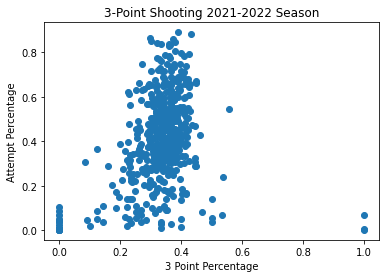

In [1502]:
plt.scatter(threes["3PPct"], threes["3PAPct"])
#plt.style.use('fivethirtyeight')
plt.title('3-Point Shooting 2021-2022 Season')
plt.xlabel('3 Point Percentage')
plt.ylabel('Attempt Percentage')
plt.show()

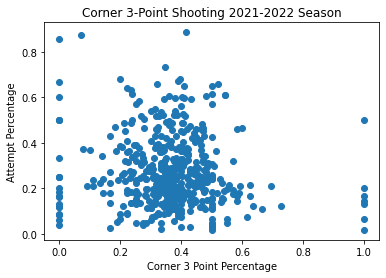

In [1503]:
plt.scatter(threes["Corner3Pct"], threes["Corner3APct"])
plt.title('Corner 3-Point Shooting 2021-2022 Season')
plt.xlabel('Corner 3 Point Percentage')
plt.ylabel('Attempt Percentage')
plt.show()

In [1504]:
#sns.pairplot(threes)

<AxesSubplot:xlabel='3PPct'>

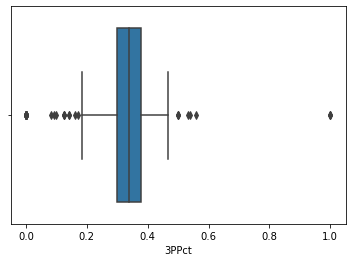

In [1505]:
sns.boxplot(x=threes["3PPct"])

<AxesSubplot:xlabel='Corner3APct'>

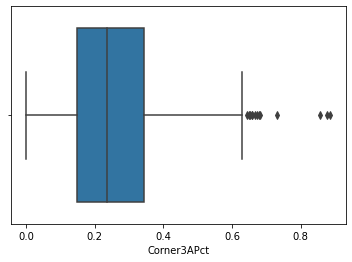

In [1506]:
sns.boxplot(x=threes["Corner3APct"])

<AxesSubplot:xlabel='3PAPct'>

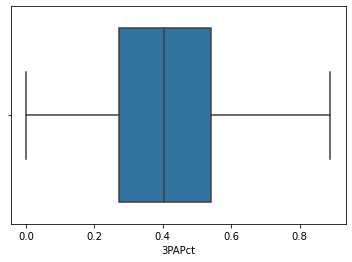

In [1507]:
sns.boxplot(x=threes["3PAPct"])

In [1508]:
adj_shooting_stats = "https://www.basketball-reference.com/leagues/NBA_2022_adj_shooting.html"
page = requests.get(adj_shooting_stats, headers={"User-Agent":"Mozilla/5.0"})
soup = BeautifulSoup(page.text, 'lxml')

In [1509]:
adj_rows_data = []
for comment in soup.find_all(string=lambda text:isinstance(text,Comment)):
    data = BeautifulSoup(comment,"lxml")
    for items in data.select("table.row_summable tr"):
        i=[item.get_text(strip=True) for item in items.select("th,td")]
        adj_rows_data.append(i)
adj_rows_data = adj_rows_data[2:]
print(adj_rows_data)

[['1', 'Precious Achiuwa', 'C', '22', 'TOR', '73', '1725', '', '.439', '.468', '.359', '.486', '.595', '.503', '.217', '.259', '', '95', '88', '102', '91', '77', '89', '88', '65', '', '-55.2', '-83.8'], ['2', 'Steven Adams', 'C', '28', 'MEM', '76', '1999', '', '.547', '.548', '.000', '.547', '.543', '.560', '.518', '.003', '', '119', '103', '', '103', '70', '99', '209', '1', '', '11.7', '-5.8'], ['3', 'Bam Adebayo', 'C', '24', 'MIA', '56', '1825', '', '.557', '.562', '.000', '.557', '.753', '.608', '.466', '.008', '', '121', '105', '', '105', '97', '107', '188', '2', '', '36.8', '73.4'], ['4', 'Santi Aldama', 'PF', '21', 'MEM', '32', '360', '', '.402', '.560', '.125', '.424', '.625', '.452', '.242', '.364', '', '87', '105', '35', '80', '81', '80', '98', '91', '', '-28.4', '-33.4'], ['5', 'LaMarcus Aldridge', 'C', '36', 'BRK', '47', '1050', '', '.550', '.578', '.304', '.566', '.873', '.604', '.223', '.100', '', '119', '108', '86', '106', '113', '107', '90', '25', '', '31.0', '37.7'], ['

In [1510]:
adj_columns = ["ID", "Player", "Pos", "Age", "Team", "GP", "MP", "", "FGPct", "2PPct", "3PPct", "EFG", "FTPct", 
               "TS", "FTRate", "3PARate", "", "AdjFG", "Adj2P", "Adj3P", "AdjEFG", "AdjFT", "AdjTS", "AdjFTRate", 
               "Adj3PARate", "", "FGAdded", "TSAdded"]

In [1511]:
adj_df = pd.DataFrame(adj_rows_data, columns=adj_columns)
adj_df.head(30)

,ID,Player,Pos,Age,Team,GP,MP,,FGPct,2PPct,...,Adj2P,Adj3P,AdjEFG,AdjFT,AdjTS,AdjFTRate,Adj3PARate,,FGAdded,TSAdded
0,1,Precious Achiuwa,C,22,TOR,73,1725,,.439,.468,...,88,102,91,77,89,88,65,,-55.2,-83.8
1,2,Steven Adams,C,28,MEM,76,1999,,.547,.548,...,103,,103,70,99,209,1,,11.7,-5.8
2,3,Bam Adebayo,C,24,MIA,56,1825,,.557,.562,...,105,,105,97,107,188,2,,36.8,73.4
3,4,Santi Aldama,PF,21,MEM,32,360,,.402,.560,...,105,35,80,81,80,98,91,,-28.4,-33.4
4,5,LaMarcus Aldridge,C,36,BRK,47,1050,,.550,.578,...,108,86,106,113,107,90,25,,31.0,37.7
5,6,Nickeil Alexander-Walker,SG,23,TOT,65,1466,,.372,.433,...,81,88,84,96,84,65,124,,-112.1,-132.0
6,7,Nickeil Alexander-Walker,SG,23,NOP,50,1317,,.375,.434,...,82,88,85,93,84,62,121,,-103.1,-124.7
7,8,Nickeil Alexander-Walker,SG,23,UTA,15,149,,.333,.400,...,75,86,82,118,88,101,172,,-9.0,-7.3
8,9,Grayson Allen,SG,26,MIL,66,1805,,.448,.533,...,100,116,111,112,108,52,171,,63.9,52.0
9,10,Jarrett Allen,C,23,CLE,56,1809,,.677,.688,...,129,28,128,91,123,172,5,,159.5,171.0


In [1512]:
del adj_df["ID"]

In [1513]:
nan_value = float("NaN")
adj_df.replace("", nan_value, inplace=True)
adj_df.dropna(how='all', axis=1, inplace=True)
adj_df.dtypes

Player        object
Pos           object
Age           object
Team          object
GP            object
MP            object
FGPct         object
2PPct         object
3PPct         object
EFG           object
FTPct         object
TS            object
FTRate        object
3PARate       object
AdjFG         object
Adj2P         object
Adj3P         object
AdjEFG        object
AdjFT         object
AdjTS         object
AdjFTRate     object
Adj3PARate    object
FGAdded       object
TSAdded       object
dtype: object

In [1514]:
adj_df=adj_df[adj_df['Pos'].notnull()]
adj_df.drop(index=adj_df[adj_df['Player'] == 'Player'].index, inplace=True)
adj_df.head(60)

,Player,Pos,Age,Team,GP,MP,FGPct,2PPct,3PPct,EFG,...,AdjFG,Adj2P,Adj3P,AdjEFG,AdjFT,AdjTS,AdjFTRate,Adj3PARate,FGAdded,TSAdded
0,Precious Achiuwa,C,22,TOR,73,1725,.439,.468,.359,.486,...,95,88,102,91,77,89,88,65,-55.2,-83.8
1,Steven Adams,C,28,MEM,76,1999,.547,.548,.000,.547,...,119,103,NaN,103,70,99,209,1,11.7,-5.8
2,Bam Adebayo,C,24,MIA,56,1825,.557,.562,.000,.557,...,121,105,NaN,105,97,107,188,2,36.8,73.4
3,Santi Aldama,PF,21,MEM,32,360,.402,.560,.125,.424,...,87,105,35,80,81,80,98,91,-28.4,-33.4
4,LaMarcus Aldridge,C,36,BRK,47,1050,.550,.578,.304,.566,...,119,108,86,106,113,107,90,25,31.0,37.7
5,Nickeil Alexander-Walker,SG,23,TOT,65,1466,.372,.433,.311,.449,...,81,81,88,84,96,84,65,124,-112.1,-132.0
6,Nickeil Alexander-Walker,SG,23,NOP,50,1317,.375,.434,.311,.450,...,81,82,88,85,93,84,62,121,-103.1,-124.7
7,Nickeil Alexander-Walker,SG,23,UTA,15,149,.333,.400,.303,.438,...,72,75,86,82,118,88,101,172,-9.0,-7.3
8,Grayson Allen,SG,26,MIL,66,1805,.448,.533,.409,.588,...,97,100,116,111,112,108,52,171,63.9,52.0
9,Jarrett Allen,C,23,CLE,56,1809,.677,.688,.100,.678,...,147,129,28,128,91,123,172,5,159.5,171.0


In [1515]:
adj_df.reset_index(drop=True, inplace=True)
adj_df.head(60)

,Player,Pos,Age,Team,GP,MP,FGPct,2PPct,3PPct,EFG,...,AdjFG,Adj2P,Adj3P,AdjEFG,AdjFT,AdjTS,AdjFTRate,Adj3PARate,FGAdded,TSAdded
0,Precious Achiuwa,C,22,TOR,73,1725,.439,.468,.359,.486,...,95,88,102,91,77,89,88,65,-55.2,-83.8
1,Steven Adams,C,28,MEM,76,1999,.547,.548,.000,.547,...,119,103,NaN,103,70,99,209,1,11.7,-5.8
2,Bam Adebayo,C,24,MIA,56,1825,.557,.562,.000,.557,...,121,105,NaN,105,97,107,188,2,36.8,73.4
3,Santi Aldama,PF,21,MEM,32,360,.402,.560,.125,.424,...,87,105,35,80,81,80,98,91,-28.4,-33.4
4,LaMarcus Aldridge,C,36,BRK,47,1050,.550,.578,.304,.566,...,119,108,86,106,113,107,90,25,31.0,37.7
5,Nickeil Alexander-Walker,SG,23,TOT,65,1466,.372,.433,.311,.449,...,81,81,88,84,96,84,65,124,-112.1,-132.0
6,Nickeil Alexander-Walker,SG,23,NOP,50,1317,.375,.434,.311,.450,...,81,82,88,85,93,84,62,121,-103.1,-124.7
7,Nickeil Alexander-Walker,SG,23,UTA,15,149,.333,.400,.303,.438,...,72,75,86,82,118,88,101,172,-9.0,-7.3
8,Grayson Allen,SG,26,MIL,66,1805,.448,.533,.409,.588,...,97,100,116,111,112,108,52,171,63.9,52.0
9,Jarrett Allen,C,23,CLE,56,1809,.677,.688,.100,.678,...,147,129,28,128,91,123,172,5,159.5,171.0


In [1516]:
adj_df[["Age", "GP", "MP", "FGPct", "2PPct", "3PPct", "EFG", "FTPct", "TS", "FTRate", "3PARate", "AdjFG", "Adj2P", "Adj3P", 
        "AdjEFG", "AdjFT", "AdjTS", "AdjFTRate", "Adj3PARate", "FGAdded", "TSAdded"]] = adj_df[["Age", "GP", "MP", "FGPct", 
        "2PPct", "3PPct", "EFG", "FTPct", "TS", "FTRate", "3PARate", "AdjFG", "Adj2P", "Adj3P", "AdjEFG", "AdjFT", "AdjTS", 
        "AdjFTRate", "Adj3PARate", "FGAdded", "TSAdded"]].apply(pd.to_numeric)
adj_df = adj_df.loc[adj_df['GP'] > 20]

In [1517]:
adj_df.dtypes

Player         object
Pos            object
Age             int64
Team           object
GP              int64
MP              int64
FGPct         float64
2PPct         float64
3PPct         float64
EFG           float64
FTPct         float64
TS            float64
FTRate        float64
3PARate       float64
AdjFG         float64
Adj2P         float64
Adj3P         float64
AdjEFG        float64
AdjFT         float64
AdjTS         float64
AdjFTRate     float64
Adj3PARate    float64
FGAdded       float64
TSAdded       float64
dtype: object

In [1518]:
df.replace(np.nan, 0,inplace = True)
adj_df.replace(np.nan,0,inplace = True)

C:\Users\abhi1\anaconda3\lib\site-packages\pandas\core\frame.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [1519]:
df

,Player,Pos,Age,Team,GP,MP,FGPct,FGDist,2PAPct,0-3APct,...,16-3PPct,3PPct,Pct2PAst,Pct3PAst,DunkPct,Dunks,Corner3APct,Corner3Pct,HeaveAttempts,Heaves
0,Precious Achiuwa,C,22,TOR,73,1725,0.439,10.2,0.741,0.348,...,0.190,0.359,0.598,0.964,0.143,67,0.429,0.313,0,0
1,Steven Adams,C,28,MEM,76,1999,0.547,2.9,0.997,0.693,...,0.000,0.000,0.490,0.000,0.143,48,0.000,0.000,1,0
2,Bam Adebayo,C,24,MIA,56,1825,0.557,7.0,0.992,0.395,...,0.313,0.000,0.608,0.000,0.181,119,0.000,0.000,2,0
3,Santi Aldama,PF,21,MEM,32,360,0.402,12.0,0.636,0.333,...,0.000,0.125,0.638,1.000,0.076,10,0.229,0.364,0,0
4,LaMarcus Aldridge,C,36,BRK,47,1050,0.550,12.3,0.900,0.210,...,0.563,0.304,0.748,1.000,0.039,18,0.283,0.308,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Thaddeus Young,PF,33,TOR,26,475,0.465,10.1,0.701,0.375,...,0.000,0.395,0.480,1.000,0.035,4,0.651,0.500,0,0
808,Trae Young,PG,23,ATL,76,2652,0.460,16.5,0.605,0.159,...,0.513,0.382,0.142,0.223,0.000,0,0.048,0.552,1,0
809,Omer Yurtseven,C,23,MIA,56,706,0.526,5.8,0.955,0.437,...,0.000,0.091,0.783,1.000,0.178,39,0.182,0.000,0,0
810,Cody Zeller,C,29,POR,27,355,0.567,3.7,0.956,0.644,...,1.000,0.000,0.725,0.000,0.211,16,0.250,0.000,0,0


In [1520]:
adj_df

,Player,Pos,Age,Team,GP,MP,FGPct,2PPct,3PPct,EFG,...,AdjFG,Adj2P,Adj3P,AdjEFG,AdjFT,AdjTS,AdjFTRate,Adj3PARate,FGAdded,TSAdded
0,Precious Achiuwa,C,22,TOR,73,1725,0.439,0.468,0.359,0.486,...,95.0,88.0,102.0,91.0,77.0,89.0,88.0,65.0,-55.2,-83.8
1,Steven Adams,C,28,MEM,76,1999,0.547,0.548,0.000,0.547,...,119.0,103.0,0.0,103.0,70.0,99.0,209.0,1.0,11.7,-5.8
2,Bam Adebayo,C,24,MIA,56,1825,0.557,0.562,0.000,0.557,...,121.0,105.0,0.0,105.0,97.0,107.0,188.0,2.0,36.8,73.4
3,Santi Aldama,PF,21,MEM,32,360,0.402,0.560,0.125,0.424,...,87.0,105.0,35.0,80.0,81.0,80.0,98.0,91.0,-28.4,-33.4
4,LaMarcus Aldridge,C,36,BRK,47,1050,0.550,0.578,0.304,0.566,...,119.0,108.0,86.0,106.0,113.0,107.0,90.0,25.0,31.0,37.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Thaddeus Young,PF,33,TOR,26,475,0.465,0.495,0.395,0.524,...,101.0,93.0,112.0,99.0,62.0,93.0,76.0,75.0,-2.1,-12.5
808,Trae Young,PG,23,ATL,76,2652,0.460,0.512,0.382,0.536,...,100.0,96.0,108.0,101.0,117.0,107.0,144.0,99.0,13.1,131.8
809,Omer Yurtseven,C,23,MIA,56,706,0.526,0.547,0.091,0.528,...,114.0,103.0,26.0,99.0,80.0,96.0,100.0,11.0,-1.7,-11.0
810,Cody Zeller,C,29,POR,27,355,0.567,0.593,0.000,0.567,...,123.0,111.0,0.0,107.0,100.0,111.0,219.0,11.0,6.3,13.7


In [1521]:
player_shooting = adj_df[["Player", "Pos", "Age", "Team", "GP", "MP", "FGPct", "2PPct", "3PPct", "EFG", "FTPct", "TS", 
                          "FTRate", "3PARate", "FGAdded", "TSAdded"]]
player_shooting

,Player,Pos,Age,Team,GP,MP,FGPct,2PPct,3PPct,EFG,FTPct,TS,FTRate,3PARate,FGAdded,TSAdded
0,Precious Achiuwa,C,22,TOR,73,1725,0.439,0.468,0.359,0.486,0.595,0.503,0.217,0.259,-55.2,-83.8
1,Steven Adams,C,28,MEM,76,1999,0.547,0.548,0.000,0.547,0.543,0.560,0.518,0.003,11.7,-5.8
2,Bam Adebayo,C,24,MIA,56,1825,0.557,0.562,0.000,0.557,0.753,0.608,0.466,0.008,36.8,73.4
3,Santi Aldama,PF,21,MEM,32,360,0.402,0.560,0.125,0.424,0.625,0.452,0.242,0.364,-28.4,-33.4
4,LaMarcus Aldridge,C,36,BRK,47,1050,0.550,0.578,0.304,0.566,0.873,0.604,0.223,0.100,31.0,37.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Thaddeus Young,PF,33,TOR,26,475,0.465,0.495,0.395,0.524,0.481,0.526,0.188,0.299,-2.1,-12.5
808,Trae Young,PG,23,ATL,76,2652,0.460,0.512,0.382,0.536,0.904,0.603,0.358,0.395,13.1,131.8
809,Omer Yurtseven,C,23,MIA,56,706,0.526,0.547,0.091,0.528,0.623,0.546,0.247,0.045,-1.7,-11.0
810,Cody Zeller,C,29,POR,27,355,0.567,0.593,0.000,0.567,0.776,0.627,0.544,0.044,6.3,13.7


In [1522]:
league_adj = adj_df[["Player", "Pos", "Age", "Team", "GP", "MP", "AdjFG", "Adj2P", "Adj3P", "AdjEFG", "AdjFT", "AdjTS", 
                     "AdjFTRate", "Adj3PARate", "FGAdded", "TSAdded"]]
league_adj

,Player,Pos,Age,Team,GP,MP,AdjFG,Adj2P,Adj3P,AdjEFG,AdjFT,AdjTS,AdjFTRate,Adj3PARate,FGAdded,TSAdded
0,Precious Achiuwa,C,22,TOR,73,1725,95.0,88.0,102.0,91.0,77.0,89.0,88.0,65.0,-55.2,-83.8
1,Steven Adams,C,28,MEM,76,1999,119.0,103.0,0.0,103.0,70.0,99.0,209.0,1.0,11.7,-5.8
2,Bam Adebayo,C,24,MIA,56,1825,121.0,105.0,0.0,105.0,97.0,107.0,188.0,2.0,36.8,73.4
3,Santi Aldama,PF,21,MEM,32,360,87.0,105.0,35.0,80.0,81.0,80.0,98.0,91.0,-28.4,-33.4
4,LaMarcus Aldridge,C,36,BRK,47,1050,119.0,108.0,86.0,106.0,113.0,107.0,90.0,25.0,31.0,37.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Thaddeus Young,PF,33,TOR,26,475,101.0,93.0,112.0,99.0,62.0,93.0,76.0,75.0,-2.1,-12.5
808,Trae Young,PG,23,ATL,76,2652,100.0,96.0,108.0,101.0,117.0,107.0,144.0,99.0,13.1,131.8
809,Omer Yurtseven,C,23,MIA,56,706,114.0,103.0,26.0,99.0,80.0,96.0,100.0,11.0,-1.7,-11.0
810,Cody Zeller,C,29,POR,27,355,123.0,111.0,0.0,107.0,100.0,111.0,219.0,11.0,6.3,13.7


<AxesSubplot:xlabel='FGAdded'>

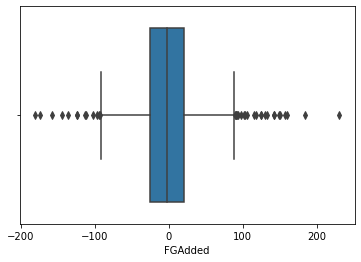

In [1523]:
sns.boxplot(x=adj_df["FGAdded"])

<AxesSubplot:xlabel='TSAdded'>

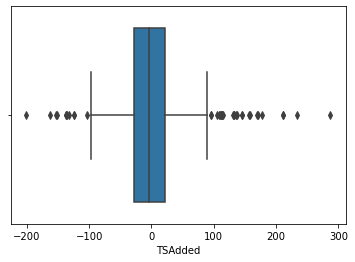

In [1524]:
sns.boxplot(x=adj_df["TSAdded"])

In [1525]:
adj_df.sort_values(by=["FGAdded"], ascending=False).head(20)

,Player,Pos,Age,Team,GP,MP,FGPct,2PPct,3PPct,EFG,...,AdjFG,Adj2P,Adj3P,AdjEFG,AdjFT,AdjTS,AdjFTRate,Adj3PARate,FGAdded,TSAdded
390,Nikola Jokić,C,26,DEN,74,2476,0.583,0.652,0.337,0.620,...,126.0,122.0,95.0,117.0,105.0,117.0,144.0,55.0,230.9,286.9
256,Rudy Gobert,C,29,UTA,66,2120,0.713,0.718,0.000,0.713,...,155.0,135.0,0.0,134.0,89.0,129.0,348.0,2.0,183.8,233.3
9,Jarrett Allen,C,23,CLE,56,1809,0.677,0.688,0.100,0.678,...,147.0,129.0,28.0,128.0,91.0,123.0,172.0,5.0,159.5,171.0
636,Mitchell Robinson,C,23,NYK,72,1848,0.761,0.761,0.000,0.761,...,165.0,143.0,0.0,143.0,63.0,128.0,213.0,0.0,157.3,131.6
789,Robert Williams,C,24,BOS,61,1804,0.736,0.738,0.000,0.736,...,160.0,139.0,0.0,139.0,93.0,132.0,99.0,1.0,150.7,145.6
27,Deandre Ayton,C,23,PHO,58,1713,0.634,0.642,0.368,0.639,...,138.0,120.0,104.0,120.0,96.0,116.0,82.0,7.0,149.8,137.3
736,Karl-Anthony Towns,C,26,MIN,74,2476,0.529,0.580,0.410,0.591,...,115.0,109.0,116.0,111.0,106.0,113.0,155.0,76.0,143.1,211.2
367,LeBron James,PF,37,LAL,56,2084,0.524,0.620,0.359,0.590,...,114.0,116.0,102.0,111.0,98.0,109.0,111.0,92.0,142.6,145.5
240,Daniel Gafford,C,23,WAS,72,1444,0.693,0.695,0.000,0.693,...,150.0,131.0,0.0,130.0,90.0,125.0,150.0,1.0,133.0,135.5
286,Montrezl Harrell,C,28,TOT,71,1641,0.645,0.658,0.235,0.649,...,140.0,124.0,67.0,122.0,92.0,120.0,215.0,8.0,129.8,156.3


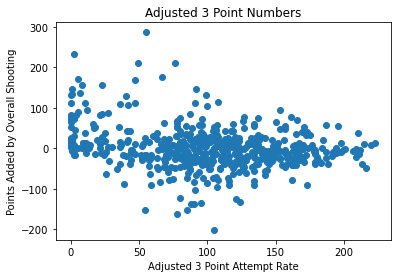

In [1526]:
plt.scatter(adj_df["Adj3PARate"], adj_df["TSAdded"])
plt.title('Adjusted 3 Point Numbers')
plt.xlabel('Adjusted 3 Point Attempt Rate')
plt.ylabel('Points Added by Overall Shooting')
plt.show()

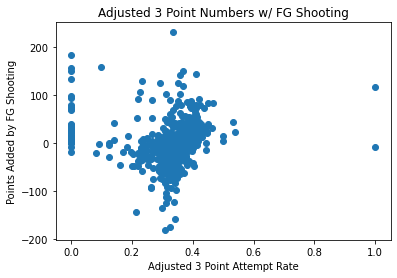

In [1527]:
plt.scatter(adj_df["3PPct"], adj_df["FGAdded"])
plt.title('Adjusted 3 Point Numbers w/ FG Shooting')
plt.xlabel('Adjusted 3 Point Attempt Rate')
plt.ylabel('Points Added by FG Shooting')
plt.show()

In [1528]:
df.mean()

<ipython-input-1528-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Age                26.323864
GP                 52.371212
MP               1215.918561
FGPct               0.460222
FGDist             13.787879
2PAPct              0.602394
0-3APct             0.271517
3-10APct            0.191867
10-16APct           0.080098
16-3PAPct           0.058983
3PAPct              0.397608
2PPct               0.524771
0-3Pct              0.666752
3-10Pct             0.415223
10-16Pct            0.368945
16-3PPct            0.332402
3PPct               0.319294
Pct2PAst            0.548926
Pct3PAst            0.808682
DunkPct             0.073621
Dunks              22.539773
Corner3APct         0.252576
Corner3Pct          0.337547
HeaveAttempts       0.914773
Heaves              0.020833
dtype: float64

In [1529]:
adj_df.mean()

<ipython-input-1529-b6e2a8bd21b6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  adj_df.mean()


Age             26.330784
GP              52.680688
MP            1225.435946
FGPct            0.460174
2PPct            0.525562
3PPct            0.317891
EFG              0.528971
FTPct            0.755298
TS               0.558801
FTRate           0.247050
3PARate          0.399004
AdjFG           99.797323
Adj2P           98.682600
Adj3P           89.913958
AdjEFG          99.468451
AdjFT           97.508604
AdjTS           98.741874
AdjFTRate       99.567878
Adj3PARate      99.917782
FGAdded          0.156597
TSAdded          0.457935
dtype: float64

<AxesSubplot:>

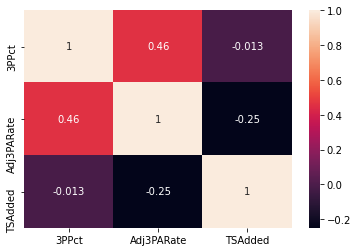

In [1530]:
correlation = adj_df[["3PPct", "Adj3PARate", "TSAdded"]].corr()
sns.heatmap(correlation, annot=True)

In [1531]:
threes.mean()

<ipython-input-1531-1f588c8b0f27>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  threes.mean()


Age              26.323864
GP               52.371212
MP             1215.918561
3PAPct            0.397608
3PPct             0.328630
Corner3APct       0.259961
Corner3Pct        0.363724
dtype: float64

In [1532]:
df.describe()

,Age,GP,MP,FGPct,FGDist,2PAPct,0-3APct,3-10APct,10-16APct,16-3PAPct,...,16-3PPct,3PPct,Pct2PAst,Pct3PAst,DunkPct,Dunks,Corner3APct,Corner3Pct,HeaveAttempts,Heaves
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,...,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,26.323864,52.371212,1215.918561,0.460222,13.787879,0.602394,0.271517,0.191867,0.080098,0.058983,...,0.332402,0.319294,0.548926,0.808682,0.073621,22.539773,0.252576,0.337547,0.914773,0.020833
std,4.305158,17.630901,694.275530,0.079399,5.000126,0.211229,0.171543,0.089777,0.056765,0.053812,...,0.212785,0.115558,0.189007,0.263121,0.100573,32.232292,0.164072,0.170365,1.350497,0.142962
min,19.000000,20.000000,58.000000,0.256000,1.200000,0.110000,0.007000,0.015000,0.000000,0.000000,...,0.000000,0.000000,0.081000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,38.000000,609.750000,0.406000,10.900000,0.458250,0.146750,0.130000,0.037750,0.018000,...,0.218500,0.297000,0.413500,0.765000,0.010000,3.000000,0.142000,0.265750,0.000000,0.000000
50%,26.000000,54.000000,1107.500000,0.448000,14.400000,0.596500,0.222000,0.179500,0.069500,0.044500,...,0.343500,0.337000,0.579000,0.909000,0.034500,10.000000,0.229000,0.358000,0.000000,0.000000
75%,29.000000,67.000000,1783.500000,0.499250,17.400000,0.727250,0.354000,0.246000,0.111250,0.086000,...,0.441250,0.377000,0.700000,0.984000,0.094000,29.000000,0.333750,0.429000,1.000000,0.000000
max,38.000000,82.000000,2854.000000,0.761000,23.600000,1.000000,0.918000,0.618000,0.346000,0.322000,...,1.000000,1.000000,1.000000,1.000000,0.630000,233.000000,0.886000,1.000000,9.000000,1.000000


In [1533]:
adj_df.describe()

,Age,GP,MP,FGPct,2PPct,3PPct,EFG,FTPct,TS,FTRate,...,AdjFG,Adj2P,Adj3P,AdjEFG,AdjFT,AdjTS,AdjFTRate,Adj3PARate,FGAdded,TSAdded
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,...,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,26.330784,52.680688,1225.435946,0.460174,0.525562,0.317891,0.528971,0.755298,0.558801,0.247050,...,99.797323,98.682600,89.913958,99.468451,97.508604,98.741874,99.567878,99.917782,0.156597,0.457935
std,4.321330,17.426786,690.615321,0.078980,0.080116,0.110544,0.063366,0.123869,0.059093,0.130296,...,17.149250,15.069908,31.268860,11.909961,16.007943,10.479880,52.489049,52.641225,48.112507,52.976583
min,19.000000,21.000000,63.000000,0.256000,0.250000,0.000000,0.269000,0.000000,0.346000,0.000000,...,56.000000,47.000000,0.000000,51.000000,0.000000,61.000000,0.000000,0.000000,-181.000000,-201.500000
25%,23.000000,38.500000,617.500000,0.406000,0.476000,0.297000,0.490500,0.697500,0.524000,0.154000,...,88.000000,89.000000,84.000000,92.000000,90.000000,93.000000,62.000000,69.000000,-24.900000,-27.700000
50%,26.000000,54.000000,1126.000000,0.448000,0.526000,0.337000,0.528000,0.773000,0.561000,0.232000,...,97.000000,99.000000,95.000000,99.000000,100.000000,99.000000,93.000000,101.000000,-1.700000,-4.400000
75%,29.000000,67.500000,1792.000000,0.498000,0.574500,0.377000,0.564000,0.842000,0.594000,0.312000,...,108.000000,108.000000,107.000000,106.000000,109.000000,105.000000,125.500000,135.000000,20.300000,21.250000
max,38.000000,82.000000,2854.000000,0.761000,0.761000,1.000000,0.761000,1.000000,0.745000,0.875000,...,165.000000,143.000000,283.000000,143.000000,129.000000,132.000000,353.000000,223.000000,230.900000,286.900000


In [1534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 811
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         528 non-null    object 
 1   Pos            528 non-null    object 
 2   Age            528 non-null    int64  
 3   Team           528 non-null    object 
 4   GP             528 non-null    int64  
 5   MP             528 non-null    int64  
 6   FGPct          528 non-null    float64
 7   FGDist         528 non-null    float64
 8   2PAPct         528 non-null    float64
 9   0-3APct        528 non-null    float64
 10  3-10APct       528 non-null    float64
 11  10-16APct      528 non-null    float64
 12  16-3PAPct      528 non-null    float64
 13  3PAPct         528 non-null    float64
 14  2PPct          528 non-null    float64
 15  0-3Pct         528 non-null    float64
 16  3-10Pct        528 non-null    float64
 17  10-16Pct       528 non-null    float64
 18  16-3PPct  

In [1535]:
adj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 811
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      523 non-null    object 
 1   Pos         523 non-null    object 
 2   Age         523 non-null    int64  
 3   Team        523 non-null    object 
 4   GP          523 non-null    int64  
 5   MP          523 non-null    int64  
 6   FGPct       523 non-null    float64
 7   2PPct       523 non-null    float64
 8   3PPct       523 non-null    float64
 9   EFG         523 non-null    float64
 10  FTPct       523 non-null    float64
 11  TS          523 non-null    float64
 12  FTRate      523 non-null    float64
 13  3PARate     523 non-null    float64
 14  AdjFG       523 non-null    float64
 15  Adj2P       523 non-null    float64
 16  Adj3P       523 non-null    float64
 17  AdjEFG      523 non-null    float64
 18  AdjFT       523 non-null    float64
 19  AdjTS       523 non-null    f

In [1536]:
df.duplicated().sum()

0

In [1537]:
adj_df.duplicated().sum()

0

In [1538]:
df.isnull().sum()

Player           0
Pos              0
Age              0
Team             0
GP               0
MP               0
FGPct            0
FGDist           0
2PAPct           0
0-3APct          0
3-10APct         0
10-16APct        0
16-3PAPct        0
3PAPct           0
2PPct            0
0-3Pct           0
3-10Pct          0
10-16Pct         0
16-3PPct         0
3PPct            0
Pct2PAst         0
Pct3PAst         0
DunkPct          0
Dunks            0
Corner3APct      0
Corner3Pct       0
HeaveAttempts    0
Heaves           0
dtype: int64

In [1539]:
adj_df.isnull().sum()

Player        0
Pos           0
Age           0
Team          0
GP            0
MP            0
FGPct         0
2PPct         0
3PPct         0
EFG           0
FTPct         0
TS            0
FTRate        0
3PARate       0
AdjFG         0
Adj2P         0
Adj3P         0
AdjEFG        0
AdjFT         0
AdjTS         0
AdjFTRate     0
Adj3PARate    0
FGAdded       0
TSAdded       0
dtype: int64

In [1540]:
adj_df[adj_df['MP']>=800].count()

Player        343
Pos           343
Age           343
Team          343
GP            343
MP            343
FGPct         343
2PPct         343
3PPct         343
EFG           343
FTPct         343
TS            343
FTRate        343
3PARate       343
AdjFG         343
Adj2P         343
Adj3P         343
AdjEFG        343
AdjFT         343
AdjTS         343
AdjFTRate     343
Adj3PARate    343
FGAdded       343
TSAdded       343
dtype: int64

<AxesSubplot:>

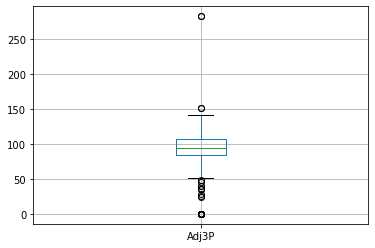

In [1541]:
adj_df[['Adj3P']].boxplot()

<AxesSubplot:>

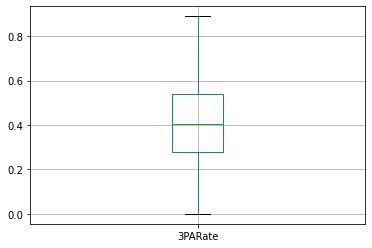

In [1542]:
adj_df[['3PARate']].boxplot()

In [1543]:
df.corr()

,Age,GP,MP,FGPct,FGDist,2PAPct,0-3APct,3-10APct,10-16APct,16-3PAPct,...,16-3PPct,3PPct,Pct2PAst,Pct3PAst,DunkPct,Dunks,Corner3APct,Corner3Pct,HeaveAttempts,Heaves
Age,1.000000,-0.073260,-0.008245,0.001350,0.107355,-0.065749,-0.127974,-0.072348,0.117130,0.147391,...,0.050737,0.061667,-0.051344,-0.026590,-0.138776,-0.141507,-0.040087,0.062465,-0.086953,-0.044897
GP,-0.073260,1.000000,0.834948,0.120115,0.043938,-0.033093,-0.066044,0.013970,0.027021,0.028813,...,0.070545,0.102307,-0.024404,0.025823,-0.049264,0.344715,0.003254,0.115037,0.293566,0.138458
MP,-0.008245,0.834948,1.000000,0.098651,0.097254,-0.026298,-0.160079,0.012359,0.206035,0.169271,...,0.119256,0.171189,-0.214813,-0.069288,-0.136368,0.349988,-0.124068,0.154965,0.330658,0.162633
FGPct,0.001350,0.120115,0.098651,1.000000,-0.776226,0.725160,0.754002,0.450283,-0.084444,-0.219766,...,-0.061937,-0.284628,0.350668,-0.333659,0.747228,0.617208,-0.128008,-0.233802,-0.140349,-0.010939
FGDist,0.107355,0.043938,0.097254,-0.776226,1.000000,-0.949634,-0.923585,-0.694101,0.071001,0.299468,...,0.236548,0.475101,-0.220797,0.364078,-0.731865,-0.533447,0.101518,0.432363,0.166061,0.040437
2PAPct,-0.065749,-0.033093,-0.026298,0.725160,-0.949634,1.000000,0.792939,0.725790,0.204922,-0.029395,...,-0.155753,-0.426046,0.050284,-0.383037,0.612349,0.480047,-0.187795,-0.395746,-0.095735,-0.009384
0-3APct,-0.127974,-0.066044,-0.160079,0.754002,-0.923585,0.792939,1.000000,0.412726,-0.326898,-0.418723,...,-0.276527,-0.497590,0.352491,-0.360282,0.826979,0.559529,-0.066457,-0.422245,-0.180956,-0.048567
3-10APct,-0.072348,0.013970,0.012359,0.450283,-0.694101,0.725790,0.412726,1.000000,0.110991,-0.251916,...,-0.124278,-0.242875,-0.047354,-0.194166,0.249010,0.244196,-0.135532,-0.276466,-0.052554,-0.033345
10-16APct,0.117130,0.027021,0.206035,-0.084444,0.071001,0.204922,-0.326898,0.110991,1.000000,0.605994,...,0.195479,0.114911,-0.425116,-0.047303,-0.288263,-0.113844,-0.145367,0.028225,0.150900,0.084858
16-3PAPct,0.147391,0.028813,0.169271,-0.219766,0.299468,-0.029395,-0.418723,-0.251916,0.605994,1.000000,...,0.270612,0.197933,-0.398515,0.019594,-0.344307,-0.186174,-0.145492,0.224091,0.130246,0.083663


In [1544]:
player_shooting.corr()

,Age,GP,MP,FGPct,2PPct,3PPct,EFG,FTPct,TS,FTRate,3PARate,FGAdded,TSAdded
Age,1.000000,-0.077556,-0.011019,0.004905,-0.009281,0.070220,0.070177,0.050722,0.076095,-0.022162,0.063233,0.095975,0.110565
GP,-0.077556,1.000000,0.831445,0.124444,0.143347,0.132965,0.205451,0.178947,0.233448,-0.014645,0.021492,0.145442,0.143373
MP,-0.011019,0.831445,1.000000,0.102269,0.092618,0.202159,0.185202,0.271873,0.255489,0.019127,0.015691,0.121886,0.184179
FGPct,0.004905,0.124444,0.102269,1.000000,0.812476,-0.302345,0.860943,-0.305412,0.835877,0.542252,-0.727725,0.655158,0.628133
2PPct,-0.009281,0.143347,0.092618,0.812476,1.000000,-0.244175,0.780042,-0.193704,0.750318,0.359421,-0.401615,0.614903,0.571096
3PPct,0.070220,0.132965,0.202159,-0.302345,-0.244175,1.000000,-0.022494,0.273230,0.005253,-0.362355,0.462689,-0.010253,-0.012694
EFG,0.070177,0.205451,0.185202,0.860943,0.780042,-0.022494,1.000000,-0.175014,0.954038,0.298887,-0.292790,0.763401,0.695544
FTPct,0.050722,0.178947,0.271873,-0.305412,-0.193704,0.273230,-0.175014,1.000000,-0.000415,-0.160191,0.326280,-0.114258,0.016353
TS,0.076095,0.233448,0.255489,0.835877,0.750318,0.005253,0.954038,-0.000415,1.000000,0.432903,-0.315450,0.727182,0.752456
FTRate,-0.022162,-0.014645,0.019127,0.542252,0.359421,-0.362355,0.298887,-0.160191,0.432903,1.000000,-0.617160,0.193019,0.384688


In [1545]:
league_adj.corr()

,Age,GP,MP,AdjFG,Adj2P,Adj3P,AdjEFG,AdjFT,AdjTS,AdjFTRate,Adj3PARate,FGAdded,TSAdded
Age,1.000000,-0.077556,-0.011019,0.005223,-0.008740,0.070276,0.068636,0.049848,0.074478,-0.022468,0.063112,0.095975,0.110565
GP,-0.077556,1.000000,0.831445,0.124345,0.145753,0.132094,0.204271,0.180331,0.233443,-0.014336,0.021589,0.145442,0.143373
MP,-0.011019,0.831445,1.000000,0.102427,0.093833,0.201543,0.184759,0.273548,0.255679,0.019368,0.015641,0.121886,0.184179
AdjFG,0.005223,0.124345,0.102427,1.000000,0.812333,-0.304195,0.860498,-0.305098,0.835919,0.543070,-0.727808,0.655589,0.628208
Adj2P,-0.008740,0.145753,0.093833,0.812333,1.000000,-0.245183,0.780297,-0.193078,0.749384,0.358045,-0.401178,0.615166,0.570672
Adj3P,0.070276,0.132094,0.201543,-0.304195,-0.245183,1.000000,-0.024809,0.274609,0.003925,-0.362477,0.462419,-0.010530,-0.013003
AdjEFG,0.068636,0.204271,0.184759,0.860498,0.780297,-0.024809,1.000000,-0.175054,0.952939,0.298586,-0.292348,0.763370,0.695153
AdjFT,0.049848,0.180331,0.273548,-0.305098,-0.193078,0.274609,-0.175054,1.000000,-0.000209,-0.160388,0.326488,-0.113984,0.016427
AdjTS,0.074478,0.233443,0.255679,0.835919,0.749384,0.003925,0.952939,-0.000209,1.000000,0.434875,-0.316380,0.726551,0.752232
AdjFTRate,-0.022468,-0.014336,0.019368,0.543070,0.358045,-0.362477,0.298586,-0.160388,0.434875,1.000000,-0.616895,0.192997,0.384800


In [1546]:
threes.corr()

,Age,GP,MP,3PAPct,3PPct,Corner3APct,Corner3Pct
Age,1.000000,-0.073260,-0.008245,0.065756,0.061143,-0.047224,0.108155
GP,-0.073260,1.000000,0.834948,0.033100,0.082986,-0.014242,0.109162
MP,-0.008245,0.834948,1.000000,0.026303,0.130310,-0.164865,0.128948
3PAPct,0.065756,0.033100,0.026303,1.000000,0.328114,0.112682,0.166423
3PPct,0.061143,0.082986,0.130310,0.328114,1.000000,0.000605,0.569639
Corner3APct,-0.047224,-0.014242,-0.164865,0.112682,0.000605,1.000000,-0.100942
Corner3Pct,0.108155,0.109162,0.128948,0.166423,0.569639,-0.100942,1.000000


In [1547]:
adj_df.corr()

,Age,GP,MP,FGPct,2PPct,3PPct,EFG,FTPct,TS,FTRate,...,AdjFG,Adj2P,Adj3P,AdjEFG,AdjFT,AdjTS,AdjFTRate,Adj3PARate,FGAdded,TSAdded
Age,1.000000,-0.077556,-0.011019,0.004905,-0.009281,0.070220,0.070177,0.050722,0.076095,-0.022162,...,0.005223,-0.008740,0.070276,0.068636,0.049848,0.074478,-0.022468,0.063112,0.095975,0.110565
GP,-0.077556,1.000000,0.831445,0.124444,0.143347,0.132965,0.205451,0.178947,0.233448,-0.014645,...,0.124345,0.145753,0.132094,0.204271,0.180331,0.233443,-0.014336,0.021589,0.145442,0.143373
MP,-0.011019,0.831445,1.000000,0.102269,0.092618,0.202159,0.185202,0.271873,0.255489,0.019127,...,0.102427,0.093833,0.201543,0.184759,0.273548,0.255679,0.019368,0.015641,0.121886,0.184179
FGPct,0.004905,0.124444,0.102269,1.000000,0.812476,-0.302345,0.860943,-0.305412,0.835877,0.542252,...,0.999851,0.812127,-0.302944,0.860873,-0.305453,0.836134,0.542296,-0.727610,0.655158,0.628133
2PPct,-0.009281,0.143347,0.092618,0.812476,1.000000,-0.244175,0.780042,-0.193704,0.750318,0.359421,...,0.812677,0.999800,-0.244818,0.780670,-0.193299,0.750231,0.359627,-0.401422,0.614903,0.571096
3PPct,0.070220,0.132965,0.202159,-0.302345,-0.244175,1.000000,-0.022494,0.273230,0.005253,-0.362355,...,-0.303592,-0.244557,0.999957,-0.023992,0.274474,0.004697,-0.362323,0.462493,-0.010253,-0.012694
EFG,0.070177,0.205451,0.185202,0.860943,0.780042,-0.022494,1.000000,-0.175014,0.954038,0.298887,...,0.860588,0.779620,-0.023313,0.999688,-0.174996,0.953608,0.299191,-0.292631,0.763401,0.695544
FTPct,0.050722,0.178947,0.271873,-0.305412,-0.193704,0.273230,-0.175014,1.000000,-0.000415,-0.160191,...,-0.305056,-0.193493,0.273355,-0.175054,0.999835,-0.000242,-0.159878,0.326484,-0.114258,0.016353
TS,0.076095,0.233448,0.255489,0.835877,0.750318,0.005253,0.954038,-0.000415,1.000000,0.432903,...,0.835643,0.749461,0.004478,0.953397,-0.000409,0.999649,0.433241,-0.315349,0.727182,0.752456
FTRate,-0.022162,-0.014645,0.019127,0.542252,0.359421,-0.362355,0.298887,-0.160191,0.432903,1.000000,...,0.543026,0.357834,-0.362508,0.298286,-0.160698,0.434533,0.999982,-0.617251,0.193019,0.384688


## 5. Try different values for k

In [1548]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

kmeans_model = KMeans(n_clusters=3, random_state=1)
good_columns=df._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_
labels

array([0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1,
       1, 2, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 2,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0,
       2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1,
       0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1,
       0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0,
       2, 1, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2,
       2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2,
       0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1,
       1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 1,

In [1549]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plot_columns

array([[ 510.05737237,   36.80001073],
       [ 783.70899587,   14.01787142],
       [ 610.50644765,   86.45620617],
       ...,
       [-509.39739349,   25.98133923],
       [-861.26270657,    8.08843939],
       [ 637.77052832,   78.15149508]])

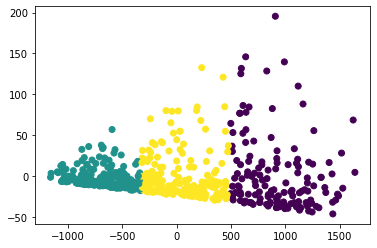

In [1550]:
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)

In [1551]:
from sklearn.model_selection import train_test_split
X=df[["FGDist"]]
Y=df[["3PPct"]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [1552]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

print(predictions)
print(y_test)

[[0.35697929]
 [0.32886167]
 [0.27937465]
 [0.35248047]
 [0.29736993]
 [0.19277236]
 [0.24900761]
 [0.17590179]
 [0.31648991]
 [0.358104  ]
 [0.35248047]
 [0.34348283]
 [0.358104  ]
 [0.2917464 ]
 [0.36935105]
 [0.30636757]
 [0.34573224]
 [0.34460754]
 [0.32323814]
 [0.3805981 ]
 [0.30186875]
 [0.22651351]
 [0.26587819]
 [0.38284751]
 [0.33785931]
 [0.4255863 ]
 [0.37160046]
 [0.26587819]
 [0.31536521]
 [0.34235813]
 [0.3142405 ]
 [0.3131158 ]
 [0.27937465]
 [0.26137937]
 [0.25238173]
 [0.34235813]
 [0.28049935]
 [0.40084279]
 [0.33111108]
 [0.19502177]
 [0.36597693]
 [0.30411816]
 [0.4042169 ]
 [0.358104  ]
 [0.38509692]
 [0.38397221]
 [0.36260282]
 [0.3367346 ]
 [0.38959574]
 [0.28612288]
 [0.30524286]
 [0.3367346 ]
 [0.2692523 ]
 [0.19839589]
 [0.39409456]
 [0.28612288]
 [0.31873932]
 [0.32211344]
 [0.32661226]
 [0.27037701]
 [0.28612288]
 [0.34460754]
 [0.35585459]
 [0.2242641 ]
 [0.34010872]
 [0.32436285]
 [0.3356099 ]
 [0.36485223]
 [0.37834869]
 [0.26250407]
 [0.41208984]
 [0.32

In [1553]:
lr_confidence = lr.score(x_test, y_test)
print("LR Confidence: ", lr_confidence)

LR Confidence:  0.2536020686243381


In [1554]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [1555]:
y_predicted = km.fit_predict(df[["3PPct", "FGDist"]])

In [1556]:
df["cluster"] = y_predicted
df.sort_values(by=['3PPct'], ascending = False).loc[df['GP'] > 20].head(60)

<ipython-input-1556-0f3eae739c24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = y_predicted


,Player,Pos,Age,Team,GP,MP,FGPct,FGDist,2PAPct,0-3APct,...,3PPct,Pct2PAst,Pct3PAst,DunkPct,Dunks,Corner3APct,Corner3Pct,HeaveAttempts,Heaves,cluster
593,Jakob Poeltl,C,26,SAS,68,1970,0.618,4.7,0.998,0.471,...,1.000,0.702,1.000,0.072,44,0.000,0.000,1,1,1
726,Tristan Thompson,PF,30,SAC,30,455,0.503,3.9,0.993,0.497,...,1.000,0.640,1.000,0.172,18,0.000,0.000,0,0,1
255,Anthony Gill,PF,29,WAS,44,463,0.569,9.2,0.761,0.294,...,0.538,0.771,1.000,0.046,3,0.462,0.583,0,0,0
339,Dwight Howard,C,36,LAL,60,971,0.612,4.5,0.932,0.630,...,0.533,0.675,0.875,0.233,40,0.133,1.000,0,0,1
216,Bruno Fernando,C,23,TOT,30,152,0.655,4.0,0.964,0.618,...,0.500,0.714,1.000,0.309,17,0.500,0.000,0,0,1
399,Kai Jones,C,21,CHO,21,63,0.643,7.7,0.857,0.500,...,0.500,0.875,1.000,0.500,7,0.500,1.000,0,0,1
297,Isaiah Hartenstein,C,23,LAC,68,1216,0.626,5.9,0.918,0.456,...,0.467,0.749,0.857,0.197,66,0.200,0.333,0,0,1
553,Zeke Nnaji,PF,21,DEN,41,698,0.516,13.1,0.570,0.355,...,0.463,0.576,0.946,0.124,20,0.425,0.500,0,0,0
148,Robert Covington,PF,31,LAC,23,509,0.500,18.7,0.327,0.185,...,0.450,0.719,0.878,0.049,6,0.211,0.696,0,0,2
411,Luke Kennard,SG,25,LAC,70,1919,0.449,20.8,0.338,0.050,...,0.449,0.660,0.916,0.000,0,0.142,0.467,0,0,2


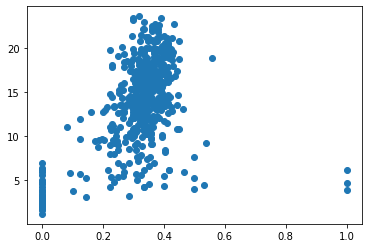

In [1557]:
plt.scatter(df["3PPct"], df["FGDist"])
plt.show()

In [1558]:
print("X_train : ", len(x_train))
print("X_test : ", len(x_test))

X_train :  422
X_test :  106


In [1559]:
print("Y_train : ", len(y_train))
print("Y_test : ", len(y_test))

Y_train :  422
Y_test :  106


In [1560]:
km.fit(x_train)
y_kmeans = km.predict(x_test)
print(y_kmeans)

[0 1 1 0 1 2 2 2 1 0 0 0 0 1 0 1 0 0 1 0 1 2 1 0 1 0 0 1 1 0 1 1 1 2 2 0 1
 0 1 2 0 1 0 0 0 0 0 1 0 1 1 1 1 2 0 1 1 1 1 1 1 0 0 2 0 1 1 0 0 2 0 1 0 0
 1 2 0 0 0 2 0 1 0 1 2 0 0 0 1 1 1 1 1 0 2 1 0 0 1 1 0 1 2 1 1 0]


Text(0.5, 0, '3 Point Percentage')

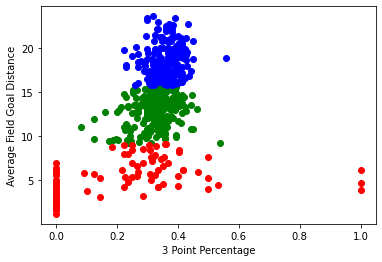

In [1561]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1["3PPct"], df1["FGDist"], color='green')
plt.scatter(df2["3PPct"], df2["FGDist"], color='red')
plt.scatter(df3["3PPct"], df3["FGDist"], color='blue')

plt.ylabel("Average Field Goal Distance")
plt.xlabel("3 Point Percentage")
#plt.legend()

In [1562]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["FGDist"]], df[["3PPct"]])
    sse.append(km.inertia_)

sse

[13175.662424242413,
 4419.614922705081,
 1905.596618924145,
 1119.344277470482,
 692.673330496388,
 527.8396246489463,
 377.21387898299207,
 284.4657753626061,
 229.76378289598105]

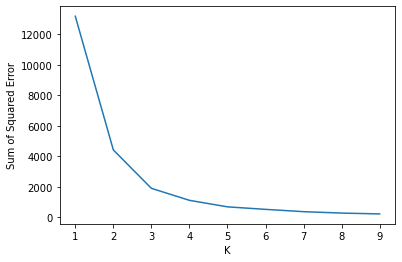

In [1563]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

## 6. Determine relevant features

In [1564]:
df.sort_values(by=['FGDist'], ascending = False).loc[df['GP'] > 20].head(20)

,Player,Pos,Age,Team,GP,MP,FGPct,FGDist,2PAPct,0-3APct,...,3PPct,Pct2PAst,Pct3PAst,DunkPct,Dunks,Corner3APct,Corner3Pct,HeaveAttempts,Heaves,cluster
55,Dāvis Bertāns,PF,29,WAS,34,501,0.351,23.6,0.158,0.053,...,0.319,0.786,1.000,0.029,5,0.194,0.571,1,0,2
205,Wayne Ellington,SG,34,LAL,43,810,0.414,23.4,0.110,0.042,...,0.389,0.875,0.951,0.000,0,0.280,0.475,0,0,2
81,Armoni Brooks,SG-PG,23,TOT,54,844,0.339,23.4,0.138,0.083,...,0.297,0.667,0.824,0.014,3,0.137,0.265,1,0,2
82,Armoni Brooks,SG,23,HOU,41,690,0.347,23.2,0.151,0.092,...,0.300,0.652,0.813,0.016,3,0.131,0.250,1,0,2
54,Dāvis Bertāns,PF,29,TOT,56,807,0.360,23.0,0.164,0.065,...,0.335,0.864,0.987,0.036,9,0.222,0.471,1,0,2
630,Duncan Robinson,SG,27,MIA,79,2043,0.399,22.7,0.140,0.077,...,0.372,0.828,0.961,0.003,2,0.239,0.423,0,0,2
299,Sam Hauser,SF,24,BOS,26,158,0.460,22.7,0.120,0.100,...,0.432,0.750,1.000,0.000,0,0.318,0.571,0,0,2
723,Matt Thomas,SG,27,CHI,40,459,0.410,22.6,0.321,0.007,...,0.385,0.850,0.886,0.000,0,0.242,0.500,0,0,2
481,Garrison Mathews,SG,25,HOU,65,1712,0.399,22.5,0.163,0.104,...,0.360,0.756,0.978,0.024,10,0.244,0.330,0,0,2
767,Lindy Waters III,SG,24,OKC,25,465,0.406,22.4,0.166,0.040,...,0.363,0.722,0.887,0.023,4,0.247,0.306,0,0,2


In [1565]:
df[["Player", "Pos", "FGDist", "3PPct", "cluster"]].sort_values(by=['3PPct'], ascending = False).loc[df['cluster'] == 0].head(60)

,Player,Pos,FGDist,3PPct,cluster
255,Anthony Gill,PF,9.2,0.538,0
553,Zeke Nnaji,PF,13.1,0.463,0
650,Olivier Sarr,C,10.8,0.448,0
275,Rui Hachimura,PF,14.7,0.447,0
637,Isaiah Roby,PF,10.8,0.444,0
323,Aaron Holiday,PG,13.5,0.444,0
484,Tyrese Maxey,PG,12.9,0.427,0
469,Sandro Mamukelashvili,PF,13.3,0.423,0
607,Norman Powell,SF-SG,14.4,0.419,0
738,P.J. Tucker,PF,13.8,0.415,0


In [1566]:
df[["Player", "Pos", "FGDist", "3PPct", "cluster"]].sort_values(by=['3PPct'], ascending = False).loc[df['cluster'] == 1].head(60)

,Player,Pos,FGDist,3PPct,cluster
217,Bruno Fernando,C,6.2,1.000,1
593,Jakob Poeltl,C,4.7,1.000,1
726,Tristan Thompson,PF,3.9,1.000,1
339,Dwight Howard,C,4.5,0.533,1
121,Willie Cauley-Stein,C,5.3,0.500,1
216,Bruno Fernando,C,4.0,0.500,1
399,Kai Jones,C,7.7,0.500,1
297,Isaiah Hartenstein,C,5.9,0.467,1
51,DeAndre' Bembry,SF,6.2,0.417,1
52,DeAndre' Bembry,SF,6.2,0.417,1


In [1567]:
df[["Player", "Pos", "FGDist", "3PPct", "cluster"]].sort_values(by=['3PPct'], ascending = False).loc[df['cluster'] == 2].head(60)

,Player,Pos,FGDist,3PPct,cluster
118,Jevon Carter,PG,18.9,0.558,2
148,Robert Covington,PF,18.7,0.450,2
411,Luke Kennard,SG,20.8,0.449,2
628,Josh Richardson,SG,17.4,0.444,2
35,Desmond Bane,SG,16.8,0.436,2
299,Sam Hauser,SF,22.7,0.432,2
622,Davon Reed,SG,18.0,0.430,2
541,Mike Muscala,C,19.6,0.429,2
171,Gorgui Dieng,C,19.2,0.426,2
24,D.J. Augustin,PG,21.1,0.426,2


In [1568]:
df=df.set_index("Player")
adj_df=adj_df.set_index("Player")
df.head(10)

,Pos,Age,Team,GP,MP,FGPct,FGDist,2PAPct,0-3APct,3-10APct,...,3PPct,Pct2PAst,Pct3PAst,DunkPct,Dunks,Corner3APct,Corner3Pct,HeaveAttempts,Heaves,cluster
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,C,22,TOR,73,1725,0.439,10.2,0.741,0.348,0.274,...,0.359,0.598,0.964,0.143,67,0.429,0.313,0,0,0
Steven Adams,C,28,MEM,76,1999,0.547,2.9,0.997,0.693,0.260,...,0.000,0.490,0.000,0.143,48,0.000,0.000,1,0,1
Bam Adebayo,C,24,MIA,56,1825,0.557,7.0,0.992,0.395,0.309,...,0.000,0.608,0.000,0.181,119,0.000,0.000,2,0,1
Santi Aldama,PF,21,MEM,32,360,0.402,12.0,0.636,0.333,0.205,...,0.125,0.638,1.000,0.076,10,0.229,0.364,0,0,0
LaMarcus Aldridge,C,36,BRK,47,1050,0.550,12.3,0.900,0.210,0.170,...,0.304,0.748,1.000,0.039,18,0.283,0.308,0,0,0
Nickeil Alexander-Walker,SG,23,TOT,65,1466,0.372,15.8,0.503,0.213,0.162,...,0.311,0.399,0.876,0.015,8,0.240,0.370,2,0,2
Nickeil Alexander-Walker,SG,23,NOP,50,1317,0.375,15.6,0.517,0.217,0.166,...,0.311,0.408,0.895,0.014,8,0.230,0.371,2,0,0
Grayson Allen,SG,26,MIL,66,1805,0.448,19.2,0.316,0.158,0.097,...,0.409,0.646,0.912,0.023,10,0.260,0.455,0,0,2
Jarrett Allen,C,23,CLE,56,1809,0.677,3.8,0.982,0.624,0.294,...,0.100,0.734,0.000,0.343,164,0.600,0.000,0,0,1


In [1569]:
df = df.reset_index().drop_duplicates(subset='Player',
                                       keep='first').set_index('Player')
df.head(60)

,Pos,Age,Team,GP,MP,FGPct,FGDist,2PAPct,0-3APct,3-10APct,...,3PPct,Pct2PAst,Pct3PAst,DunkPct,Dunks,Corner3APct,Corner3Pct,HeaveAttempts,Heaves,cluster
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,C,22,TOR,73,1725,0.439,10.2,0.741,0.348,0.274,...,0.359,0.598,0.964,0.143,67,0.429,0.313,0,0,0
Steven Adams,C,28,MEM,76,1999,0.547,2.9,0.997,0.693,0.260,...,0.000,0.490,0.000,0.143,48,0.000,0.000,1,0,1
Bam Adebayo,C,24,MIA,56,1825,0.557,7.0,0.992,0.395,0.309,...,0.000,0.608,0.000,0.181,119,0.000,0.000,2,0,1
Santi Aldama,PF,21,MEM,32,360,0.402,12.0,0.636,0.333,0.205,...,0.125,0.638,1.000,0.076,10,0.229,0.364,0,0,0
LaMarcus Aldridge,C,36,BRK,47,1050,0.550,12.3,0.900,0.210,0.170,...,0.304,0.748,1.000,0.039,18,0.283,0.308,0,0,0
Nickeil Alexander-Walker,SG,23,TOT,65,1466,0.372,15.8,0.503,0.213,0.162,...,0.311,0.399,0.876,0.015,8,0.240,0.370,2,0,2
Grayson Allen,SG,26,MIL,66,1805,0.448,19.2,0.316,0.158,0.097,...,0.409,0.646,0.912,0.023,10,0.260,0.455,0,0,2
Jarrett Allen,C,23,CLE,56,1809,0.677,3.8,0.982,0.624,0.294,...,0.100,0.734,0.000,0.343,164,0.600,0.000,0,0,1
Jose Alvarado,PG,23,NOP,54,834,0.446,13.6,0.626,0.235,0.248,...,0.291,0.303,0.969,0.000,0,0.227,0.320,1,0,0


In [1570]:
adj_df = adj_df.reset_index().drop_duplicates(subset='Player',
                                       keep='first').set_index('Player')
adj_df.head(60)

,Pos,Age,Team,GP,MP,FGPct,2PPct,3PPct,EFG,FTPct,...,AdjFG,Adj2P,Adj3P,AdjEFG,AdjFT,AdjTS,AdjFTRate,Adj3PARate,FGAdded,TSAdded
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,C,22,TOR,73,1725,0.439,0.468,0.359,0.486,0.595,...,95.0,88.0,102.0,91.0,77.0,89.0,88.0,65.0,-55.2,-83.8
Steven Adams,C,28,MEM,76,1999,0.547,0.548,0.000,0.547,0.543,...,119.0,103.0,0.0,103.0,70.0,99.0,209.0,1.0,11.7,-5.8
Bam Adebayo,C,24,MIA,56,1825,0.557,0.562,0.000,0.557,0.753,...,121.0,105.0,0.0,105.0,97.0,107.0,188.0,2.0,36.8,73.4
Santi Aldama,PF,21,MEM,32,360,0.402,0.560,0.125,0.424,0.625,...,87.0,105.0,35.0,80.0,81.0,80.0,98.0,91.0,-28.4,-33.4
LaMarcus Aldridge,C,36,BRK,47,1050,0.550,0.578,0.304,0.566,0.873,...,119.0,108.0,86.0,106.0,113.0,107.0,90.0,25.0,31.0,37.7
Nickeil Alexander-Walker,SG,23,TOT,65,1466,0.372,0.433,0.311,0.449,0.743,...,81.0,81.0,88.0,84.0,96.0,84.0,65.0,124.0,-112.1,-132.0
Grayson Allen,SG,26,MIL,66,1805,0.448,0.533,0.409,0.588,0.865,...,97.0,100.0,116.0,111.0,112.0,108.0,52.0,171.0,63.9,52.0
Jarrett Allen,C,23,CLE,56,1809,0.677,0.688,0.100,0.678,0.708,...,147.0,129.0,28.0,128.0,91.0,123.0,172.0,5.0,159.5,171.0
Jose Alvarado,PG,23,NOP,54,834,0.446,0.538,0.291,0.500,0.679,...,97.0,101.0,82.0,94.0,88.0,92.0,73.0,94.0,-18.6,-29.2


In [1571]:
num_df = df.drop(['Pos', 'Age', 'Team', 'DunkPct', 'Dunks', 'HeaveAttempts', 'Heaves', 'cluster'], axis=1)
num_df

,GP,MP,FGPct,FGDist,2PAPct,0-3APct,3-10APct,10-16APct,16-3PAPct,3PAPct,2PPct,0-3Pct,3-10Pct,10-16Pct,16-3PPct,3PPct,Pct2PAst,Pct3PAst,Corner3APct,Corner3Pct
Player,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,73,1725,0.439,10.2,0.741,0.348,0.274,0.085,0.035,0.259,0.468,0.614,0.345,0.373,0.190,0.359,0.598,0.964,0.429,0.313
Steven Adams,76,1999,0.547,2.9,0.997,0.693,0.260,0.042,0.003,0.003,0.548,0.632,0.350,0.438,0.000,0.000,0.490,0.000,0.000,0.000
Bam Adebayo,56,1825,0.557,7.0,0.992,0.395,0.309,0.200,0.088,0.008,0.562,0.771,0.467,0.404,0.313,0.000,0.608,0.000,0.000,0.000
Santi Aldama,32,360,0.402,12.0,0.636,0.333,0.205,0.091,0.008,0.364,0.560,0.682,0.444,0.417,0.000,0.125,0.638,1.000,0.229,0.364
LaMarcus Aldridge,47,1050,0.550,12.3,0.900,0.210,0.170,0.240,0.279,0.100,0.578,0.729,0.513,0.509,0.563,0.304,0.748,1.000,0.283,0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thaddeus Young,52,845,0.518,7.7,0.824,0.382,0.393,0.026,0.022,0.176,0.554,0.625,0.523,0.286,0.167,0.354,0.524,1.000,0.604,0.483
Trae Young,76,2652,0.460,16.5,0.605,0.159,0.204,0.116,0.126,0.395,0.512,0.620,0.451,0.469,0.513,0.382,0.142,0.223,0.048,0.552
Omer Yurtseven,56,706,0.526,5.8,0.955,0.437,0.385,0.113,0.020,0.045,0.547,0.722,0.432,0.357,0.000,0.091,0.783,1.000,0.182,0.000


In [1572]:
adj_num_df = adj_df.drop(['Pos', 'Age', 'Team'], axis=1)
adj_num_df.head(10)

,GP,MP,FGPct,2PPct,3PPct,EFG,FTPct,TS,FTRate,3PARate,AdjFG,Adj2P,Adj3P,AdjEFG,AdjFT,AdjTS,AdjFTRate,Adj3PARate,FGAdded,TSAdded
Player,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,73,1725,0.439,0.468,0.359,0.486,0.595,0.503,0.217,0.259,95.0,88.0,102.0,91.0,77.0,89.0,88.0,65.0,-55.2,-83.8
Steven Adams,76,1999,0.547,0.548,0.000,0.547,0.543,0.560,0.518,0.003,119.0,103.0,0.0,103.0,70.0,99.0,209.0,1.0,11.7,-5.8
Bam Adebayo,56,1825,0.557,0.562,0.000,0.557,0.753,0.608,0.466,0.008,121.0,105.0,0.0,105.0,97.0,107.0,188.0,2.0,36.8,73.4
Santi Aldama,32,360,0.402,0.560,0.125,0.424,0.625,0.452,0.242,0.364,87.0,105.0,35.0,80.0,81.0,80.0,98.0,91.0,-28.4,-33.4
LaMarcus Aldridge,47,1050,0.550,0.578,0.304,0.566,0.873,0.604,0.223,0.100,119.0,108.0,86.0,106.0,113.0,107.0,90.0,25.0,31.0,37.7
Nickeil Alexander-Walker,65,1466,0.372,0.433,0.311,0.449,0.743,0.475,0.160,0.497,81.0,81.0,88.0,84.0,96.0,84.0,65.0,124.0,-112.1,-132.0
Grayson Allen,66,1805,0.448,0.533,0.409,0.588,0.865,0.609,0.130,0.684,97.0,100.0,116.0,111.0,112.0,108.0,52.0,171.0,63.9,52.0
Jarrett Allen,56,1809,0.677,0.688,0.100,0.678,0.708,0.698,0.428,0.018,147.0,129.0,28.0,128.0,91.0,123.0,172.0,5.0,159.5,171.0
Jose Alvarado,54,834,0.446,0.538,0.291,0.500,0.679,0.520,0.180,0.374,97.0,101.0,82.0,94.0,88.0,92.0,73.0,94.0,-18.6,-29.2


In [1573]:
num_df.dtypes

GP               int64
MP               int64
FGPct          float64
FGDist         float64
2PAPct         float64
0-3APct        float64
3-10APct       float64
10-16APct      float64
16-3PAPct      float64
3PAPct         float64
2PPct          float64
0-3Pct         float64
3-10Pct        float64
10-16Pct       float64
16-3PPct       float64
3PPct          float64
Pct2PAst       float64
Pct3PAst       float64
Corner3APct    float64
Corner3Pct     float64
dtype: object

In [1574]:
adj_num_df.dtypes

GP              int64
MP              int64
FGPct         float64
2PPct         float64
3PPct         float64
EFG           float64
FTPct         float64
TS            float64
FTRate        float64
3PARate       float64
AdjFG         float64
Adj2P         float64
Adj3P         float64
AdjEFG        float64
AdjFT         float64
AdjTS         float64
AdjFTRate     float64
Adj3PARate    float64
FGAdded       float64
TSAdded       float64
dtype: object

In [1575]:
num_df.corr()

,GP,MP,FGPct,FGDist,2PAPct,0-3APct,3-10APct,10-16APct,16-3PAPct,3PAPct,2PPct,0-3Pct,3-10Pct,10-16Pct,16-3PPct,3PPct,Pct2PAst,Pct3PAst,Corner3APct,Corner3Pct
GP,1.000000,0.828711,0.131773,0.068483,-0.045038,-0.102493,0.017873,0.065062,0.051236,0.045044,0.136074,0.117204,0.186200,0.216297,0.068272,0.174873,-0.059498,0.003357,-0.045230,0.119989
MP,0.828711,1.000000,0.097478,0.111294,-0.024078,-0.187787,0.020681,0.246673,0.208959,0.024082,0.073204,0.140100,0.189028,0.269692,0.115630,0.225957,-0.246262,-0.093652,-0.162547,0.152284
FGPct,0.131773,0.097478,1.000000,-0.782648,0.731683,0.756862,0.452845,-0.061902,-0.235688,-0.731685,0.812401,0.494749,0.394530,0.116042,-0.079056,-0.313366,0.375208,-0.331800,-0.120584,-0.240833
FGDist,0.068483,0.111294,-0.782648,1.000000,-0.949048,-0.921922,-0.690523,0.059881,0.308472,0.949051,-0.505562,-0.171327,-0.206279,-0.002886,0.228288,0.527431,-0.226559,0.351082,0.076317,0.405080
2PAPct,-0.045038,-0.024078,0.731683,-0.949048,1.000000,0.788536,0.725462,0.219879,-0.036688,-1.000000,0.396064,0.153998,0.247999,0.117572,-0.142595,-0.478698,0.053135,-0.379951,-0.165673,-0.374854
0-3APct,-0.102493,-0.187787,0.756862,-0.921922,0.788536,1.000000,0.405017,-0.323951,-0.428953,-0.788539,0.565379,0.190416,0.064051,-0.131844,-0.284759,-0.553585,0.360871,-0.343832,-0.034165,-0.392286
3-10APct,0.017873,0.020681,0.452845,-0.690523,0.725462,0.405017,1.000000,0.125903,-0.254788,-0.725460,0.210897,0.034357,0.368192,0.164950,-0.084904,-0.247226,-0.061887,-0.182801,-0.141227,-0.252608
10-16APct,0.065062,0.246673,-0.061902,0.059881,0.219879,-0.323951,0.125903,1.000000,0.623523,-0.219881,-0.233229,-0.009626,0.184197,0.363848,0.204451,0.095907,-0.415927,-0.082309,-0.140771,0.004110
16-3PAPct,0.051236,0.208959,-0.235688,0.308472,-0.036688,-0.428953,-0.254788,0.623523,1.000000,0.036699,-0.356767,-0.051026,-0.044631,0.218960,0.275381,0.199771,-0.399316,-0.000894,-0.157484,0.200607
3PAPct,0.045044,0.024082,-0.731685,0.949051,-1.000000,-0.788539,-0.725460,-0.219881,0.036699,1.000000,-0.396073,-0.154004,-0.247997,-0.117574,0.142594,0.478708,-0.053143,0.379953,0.165672,0.374864


### 7.Run K-Means algorithm to classify players into groups by shooting efficiency and capability

In [1576]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

kmeans_model = KMeans(n_clusters=3, random_state=1)
num_good_columns=num_df._get_numeric_data().dropna(axis=1)
kmeans_model.fit(num_good_columns)
labels = kmeans_model.labels_
labels

array([1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0,
       0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1,
       0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 1, 2,
       0, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2,
       0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0,
       2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0,
       0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2,
       0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1,
       2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0,
       1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 0,

In [1577]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(num_good_columns)
plot_columns

array([[ 4.16619466e+02,  9.03729163e+00],
       [ 6.90620511e+02,  6.98316320e+00],
       [ 5.16269990e+02, -9.78020076e+00],
       [-9.48915939e+02, -5.67729609e+00],
       [-2.58754887e+02, -3.99986800e+00],
       [ 1.57517768e+02,  5.85388787e+00],
       [ 4.96476407e+02,  2.10998180e-01],
       [ 5.00270450e+02, -9.36597450e+00],
       [-4.74578301e+02,  7.11527730e+00],
       [ 1.75587647e+02,  9.66916651e+00],
       [ 8.95413991e+02, -6.18957769e+00],
       [-8.35633283e+02,  8.34579391e+00],
       [ 4.84536539e+02,  3.44146685e+00],
       [ 7.50407323e+02, -5.59247627e+00],
       [ 4.19139948e+02, -1.61610475e+01],
       [-8.47083825e+02, -1.58707799e+01],
       [-4.25562907e+02,  6.95486520e+00],
       [ 6.75748211e+02,  1.29024811e+01],
       [ 4.04329528e+02, -5.61775624e+00],
       [-1.62755979e+02, -4.75042303e+00],
       [ 1.11353239e+03, -2.58684744e+00],
       [-9.70109587e+01, -1.93592754e+01],
       [ 5.15565570e+02,  4.99844618e+00],
       [ 9.

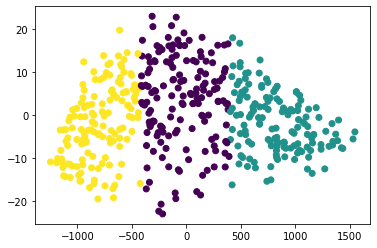

In [1578]:
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)

In [1579]:
from sklearn.model_selection import train_test_split
X=num_df[["FGDist"]]
Y=num_df[["3PAPct"]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

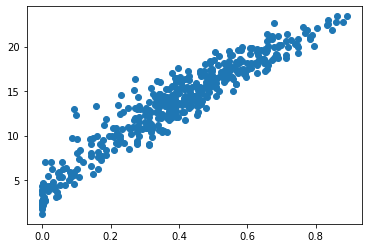

In [1580]:
plt.scatter(num_df["3PAPct"], num_df["FGDist"])
plt.show()

In [1581]:
km.fit(x_train)
y_kmeans = km.predict(x_test)
print(y_kmeans)

[8 3 3 3 8 8 8 3 6 0 3 8 3 8 3 0 2 8 6 7 5 7 5 0 3 0 1 3 8 6 3 5 8 8 6 0 7
 6 8 5 4 1 3 5 4 0 5 3 6 3 1 5 6 3 8 8 7 5 8 6 3 8 5 4 2 2 7 0 0 5 7 8 3 4
 5 8 8 1 2 5 3 1 5 8 7 3 5 5 7]


In [1582]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

print(predictions)
print(y_test)

[[ 0.59500961]
 [ 0.54653254]
 [ 0.53441327]
 [ 0.52633376]
 [ 0.60712887]
 [ 0.57481083]
 [ 0.57885058]
 [ 0.48593621]
 [ 0.2233521 ]
 [ 0.35666403]
 [ 0.52229401]
 [ 0.58289034]
 [ 0.51017474]
 [ 0.61520838]
 [ 0.48593621]
 [ 0.3324255 ]
 [-0.00691397]
 [ 0.57077107]
 [ 0.23951112]
 [ 0.0779209 ]
 [ 0.42533987]
 [ 0.07388114]
 [ 0.46573743]
 [ 0.35666403]
 [ 0.56673132]
 [ 0.35262427]
 [ 0.73640105]
 [ 0.53845303]
 [ 0.62732765]
 [ 0.29202794]
 [ 0.48593621]
 [ 0.46169767]
 [ 0.57885058]
 [ 0.57077107]
 [ 0.2960677 ]
 [ 0.38494232]
 [ 0.11023894]
 [ 0.27990867]
 [ 0.61520838]
 [ 0.45765792]
 [ 0.12639796]
 [ 0.72832154]
 [ 0.50209523]
 [ 0.42937963]
 [ 0.12639796]
 [ 0.38898207]
 [ 0.4778567 ]
 [ 0.50613499]
 [ 0.2960677 ]
 [ 0.53037352]
 [ 0.70812276]
 [ 0.40110134]
 [ 0.27182916]
 [ 0.51825425]
 [ 0.59096985]
 [ 0.59096985]
 [ 0.08196065]
 [ 0.40918085]
 [ 0.57481083]
 [ 0.28798819]
 [ 0.52229401]
 [ 0.62732765]
 [ 0.42533987]
 [ 0.21123283]
 [-0.05539103]
 [-0.00287421]
 [ 0.08196

In [1583]:
num_lr_confidence = lr.score(x_test, y_test)
print("LR Confidence: ", num_lr_confidence)

LR Confidence:  0.8934210637326564


In [1584]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [1585]:
y_predicted = km.fit_predict(num_df[["3PAPct", "FGDist"]])

In [1586]:
num_df["cluster"] = y_predicted
num_df.sort_values(by=['3PPct'], ascending = False).loc[num_df['GP'] > 20].head(60)

,GP,MP,FGPct,FGDist,2PAPct,0-3APct,3-10APct,10-16APct,16-3PAPct,3PAPct,...,0-3Pct,3-10Pct,10-16Pct,16-3PPct,3PPct,Pct2PAst,Pct3PAst,Corner3APct,Corner3Pct,cluster
Player,,,,,,,,,,,,,,,,,,,,,
Jakob Poeltl,68,1970,0.618,4.7,0.998,0.471,0.391,0.133,0.005,0.002,...,0.747,0.514,0.477,0.333,1.000,0.702,1.000,0.000,0.000,2
Anthony Gill,44,463,0.569,9.2,0.761,0.294,0.450,0.018,0.000,0.239,...,0.625,0.551,0.500,0.000,0.538,0.771,1.000,0.462,0.583,0
Dwight Howard,60,971,0.612,4.5,0.932,0.630,0.251,0.037,0.014,0.068,...,0.732,0.418,0.250,0.000,0.533,0.675,0.875,0.133,1.000,2
Bruno Fernando,30,152,0.655,4.0,0.964,0.618,0.291,0.036,0.018,0.036,...,0.676,0.625,0.500,1.000,0.500,0.714,1.000,0.500,0.000,2
Kai Jones,21,63,0.643,7.7,0.857,0.500,0.214,0.071,0.071,0.143,...,1.000,0.333,0.000,0.000,0.500,0.875,1.000,0.500,1.000,2
Isaiah Hartenstein,68,1216,0.626,5.9,0.918,0.456,0.369,0.093,0.000,0.082,...,0.754,0.519,0.559,0.000,0.467,0.749,0.857,0.200,0.333,2
Zeke Nnaji,41,698,0.516,13.1,0.570,0.355,0.156,0.005,0.054,0.430,...,0.727,0.241,0.000,0.400,0.463,0.576,0.946,0.425,0.500,0
Luke Kennard,70,1919,0.449,20.8,0.338,0.050,0.086,0.121,0.081,0.662,...,0.625,0.455,0.416,0.385,0.449,0.660,0.916,0.142,0.467,1
Olivier Sarr,22,421,0.574,10.8,0.713,0.238,0.396,0.069,0.010,0.287,...,0.667,0.575,0.857,0.000,0.448,0.778,1.000,0.241,0.143,0


In [1587]:
print("X_train : ", len(x_train))
print("X_test : ", len(x_test))
print("Y_train : ", len(y_train))
print("Y_test : ", len(y_test))

X_train :  354
X_test :  89
Y_train :  354
Y_test :  89


In [1588]:
km.fit(x_train)
y_kmeans = km.predict(x_test)
print(y_kmeans)

[1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 2 1 0 2 0 2 0 0 1 0 1 1 1 0 1 0 1 1 0 0 2
 0 1 0 2 1 1 0 2 0 1 1 0 1 1 0 0 1 1 1 2 0 1 0 1 1 0 0 2 2 2 0 0 1 2 1 1 2
 0 1 1 1 2 0 1 1 0 1 2 1 0 0 2]


Text(0, 0.5, 'Average Field Goal Distance')

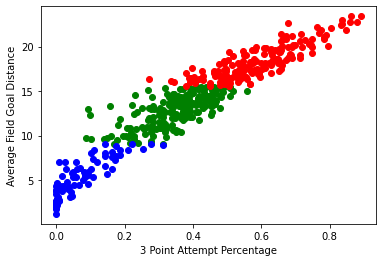

In [1589]:
df1 = num_df[num_df.cluster==0]
df2 = num_df[num_df.cluster==1]
df3 = num_df[num_df.cluster==2]
#df4 = num_df[num_df.cluster==3]

plt.scatter(df1["3PAPct"], df1["FGDist"], color='green')
plt.scatter(df2["3PAPct"], df2["FGDist"], color='red')
plt.scatter(df3["3PAPct"], df3["FGDist"], color='blue')
#plt.scatter(df4["3PAPct"], df4["FGDist"], color='yellow')

plt.xlabel("3 Point Attempt Percentage")
plt.ylabel("Average Field Goal Distance")

In [1590]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(num_df[["3PPct"]], num_df[["FGDist"]])
    sse.append(km.inertia_)

sse

[4.979866180586903,
 1.7982454448439515,
 0.9734150746054527,
 0.5928001516796455,
 0.3342888893420422,
 0.2287167894159826,
 0.16684325934935199,
 0.10849719029943732,
 0.07874772956989147]

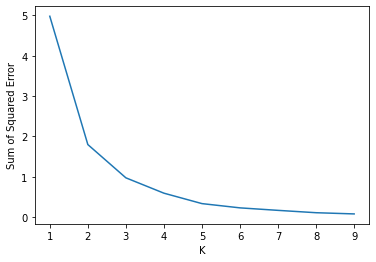

In [1591]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

In [1592]:
num_df[["FGDist", "3PPct", "3PAPct", "cluster"]].sort_values(by=['FGDist'], ascending = False).loc[num_df['cluster'] == 2].head(60)

,FGDist,3PPct,3PAPct,cluster
Player,,,,
Alperen Şengün,9.0,0.248,0.223,2
Dennis Smith Jr.,9.0,0.222,0.143,2
David Nwaba,9.0,0.306,0.278,2
Derrick Jones Jr.,8.9,0.328,0.313,2
Trent Forrest,8.8,0.185,0.174,2
Wenyen Gabriel,8.5,0.286,0.255,2
Keita Bates-Diop,8.4,0.309,0.209,2
Bruce Brown,8.4,0.404,0.186,2
Evan Mobley,8.4,0.250,0.111,2


In [1593]:
num_df[["FGDist", "3PPct", "3PAPct", "cluster"]].sort_values(by=['FGDist'], ascending = False).loc[num_df['cluster'] == 1].head(60)

,FGDist,3PPct,3PAPct,cluster
Player,,,,
Wayne Ellington,23.4,0.389,0.890,1
Armoni Brooks,23.4,0.297,0.862,1
Dāvis Bertāns,23.0,0.335,0.836,1
Duncan Robinson,22.7,0.372,0.860,1
Sam Hauser,22.7,0.432,0.880,1
Matt Thomas,22.6,0.385,0.679,1
Garrison Mathews,22.5,0.360,0.837,1
Lindy Waters III,22.4,0.363,0.834,1
Isaiah Joe,22.2,0.333,0.763,1


In [1594]:
num_df[["FGDist", "3PPct", "3PAPct", "cluster"]].sort_values(by=['3PPct'], ascending = False).loc[num_df['cluster'] == 0].head(60)

,FGDist,3PPct,3PAPct,cluster
Player,,,,
Anthony Gill,9.2,0.538,0.239,0
Zeke Nnaji,13.1,0.463,0.430,0
Olivier Sarr,10.8,0.448,0.287,0
Rui Hachimura,14.7,0.447,0.323,0
Isaiah Roby,10.8,0.444,0.307,0
Tyrese Maxey,12.9,0.427,0.311,0
Sandro Mamukelashvili,13.3,0.423,0.452,0
Norman Powell,14.4,0.419,0.418,0
P.J. Tucker,13.8,0.415,0.451,0


In [1595]:
num_df[["FGDist", "FGPct", "3PPct", "3PAPct", "cluster"]].sort_values(by=['FGPct'], ascending = False).head(60)

,FGDist,FGPct,3PPct,3PAPct,cluster
Player,,,,,
Mitchell Robinson,1.2,0.761,0.000,0.000,2
Robert Williams,2.4,0.736,0.000,0.003,2
Jericho Sims,2.0,0.722,0.000,0.000,2
Rudy Gobert,2.7,0.713,0.000,0.008,2
Daniel Gafford,2.9,0.693,0.000,0.002,2
Onyeka Okongwu,2.7,0.690,0.000,0.000,2
Ed Davis,2.3,0.688,0.000,0.000,2
Jarrett Allen,3.8,0.677,0.100,0.018,2
Nic Claxton,2.5,0.674,0.000,0.000,2


In [1596]:
num_df[["FGDist", "FGPct", "3PPct", "3PAPct", "cluster"]].loc[["LeBron James", "Stephen Curry", "Kevin Durant",
        "Seth Curry", "Damian Lillard", "Steven Adams", "Darius Garland", "Luka Dončić", "Joel Embiid", "Nikola Jokić",
       "Devin Booker", "Trae Young", "Ja Morant", "Bradley Beal", "Jimmy Butler", "Kevin Love"]]

,FGDist,FGPct,3PPct,3PAPct,cluster
Player,,,,,
LeBron James,13.8,0.524,0.359,0.367,0
Stephen Curry,19.8,0.437,0.380,0.613,1
Kevin Durant,15.1,0.518,0.383,0.269,0
Seth Curry,19.4,0.487,0.422,0.506,1
Damian Lillard,17.9,0.402,0.324,0.514,1
Steven Adams,2.9,0.547,0.000,0.003,2
Darius Garland,15.5,0.462,0.383,0.387,0
Luka Dončić,15.9,0.457,0.353,0.406,1
Joel Embiid,11.9,0.499,0.371,0.188,0


In [1597]:
#pd.DataFrame.to_excel(df_cluster, "PlayerSpacingClusters2022.xlsx")

In [1598]:
kmeans_model = KMeans(n_clusters=4, random_state=1)
num_good_columns=num_df._get_numeric_data().dropna(axis=1)
kmeans_model.fit(num_good_columns)
labels = kmeans_model.labels_
labels

array([3, 1, 3, 2, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 2, 0, 3, 3, 0, 1, 0,
       3, 1, 2, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3, 3, 0, 0, 3, 1, 0, 2, 2, 0,
       0, 2, 3, 1, 2, 1, 0, 3, 2, 3, 2, 2, 1, 1, 3, 0, 0, 0, 3, 2, 2, 1,
       2, 2, 0, 1, 2, 3, 2, 1, 2, 3, 1, 0, 1, 0, 3, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 3, 3, 2, 1, 3, 2, 2, 3, 3, 3, 2, 1, 1, 1, 3, 2, 2, 0, 1,
       0, 2, 3, 0, 1, 3, 1, 2, 3, 3, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 2,
       0, 0, 1, 1, 2, 2, 3, 3, 1, 2, 2, 0, 0, 0, 3, 3, 2, 1, 2, 1, 3, 1,
       3, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 1, 3, 0, 1, 0, 3, 3, 1, 3, 0, 2,
       3, 3, 3, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 3, 2, 0, 2, 1, 2, 3, 0,
       0, 2, 0, 3, 0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 3, 2, 0, 1, 2, 0, 1, 0,
       0, 1, 2, 0, 3, 2, 3, 3, 3, 3, 2, 2, 0, 3, 2, 0, 1, 0, 2, 0, 1, 2,
       0, 2, 2, 3, 2, 0, 0, 3, 2, 3, 1, 2, 3, 0, 2, 1, 3, 2, 3, 2, 3, 3,
       2, 3, 3, 0, 1, 2, 2, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 2, 0,
       1, 1, 1, 1, 2, 3, 3, 1, 0, 1, 2, 2, 0, 2, 3,

In [1599]:
from sklearn.decomposition import PCA
pca_3 = PCA(3)
plot_columns = pca_3.fit_transform(num_good_columns)
plot_columns

array([[ 416.6195745 ,    9.03117054,    3.52799396],
       [ 690.62030916,    6.99719797,   11.23163267],
       [ 516.26979066,   -9.76623638,    7.54188437],
       ...,
       [-602.52213861,   11.84639871,    7.1337118 ],
       [-954.01822746,  -10.30241751,    9.68757858],
       [ 543.64818017,    9.81527128,   10.52515396]])

In [1600]:
num_df = df.drop(['Pos', 'Age', 'Team', 'DunkPct', 'Dunks', 'HeaveAttempts', 'Heaves', 'cluster'], axis=1)
num_df

,GP,MP,FGPct,FGDist,2PAPct,0-3APct,3-10APct,10-16APct,16-3PAPct,3PAPct,2PPct,0-3Pct,3-10Pct,10-16Pct,16-3PPct,3PPct,Pct2PAst,Pct3PAst,Corner3APct,Corner3Pct
Player,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,73,1725,0.439,10.2,0.741,0.348,0.274,0.085,0.035,0.259,0.468,0.614,0.345,0.373,0.190,0.359,0.598,0.964,0.429,0.313
Steven Adams,76,1999,0.547,2.9,0.997,0.693,0.260,0.042,0.003,0.003,0.548,0.632,0.350,0.438,0.000,0.000,0.490,0.000,0.000,0.000
Bam Adebayo,56,1825,0.557,7.0,0.992,0.395,0.309,0.200,0.088,0.008,0.562,0.771,0.467,0.404,0.313,0.000,0.608,0.000,0.000,0.000
Santi Aldama,32,360,0.402,12.0,0.636,0.333,0.205,0.091,0.008,0.364,0.560,0.682,0.444,0.417,0.000,0.125,0.638,1.000,0.229,0.364
LaMarcus Aldridge,47,1050,0.550,12.3,0.900,0.210,0.170,0.240,0.279,0.100,0.578,0.729,0.513,0.509,0.563,0.304,0.748,1.000,0.283,0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thaddeus Young,52,845,0.518,7.7,0.824,0.382,0.393,0.026,0.022,0.176,0.554,0.625,0.523,0.286,0.167,0.354,0.524,1.000,0.604,0.483
Trae Young,76,2652,0.460,16.5,0.605,0.159,0.204,0.116,0.126,0.395,0.512,0.620,0.451,0.469,0.513,0.382,0.142,0.223,0.048,0.552
Omer Yurtseven,56,706,0.526,5.8,0.955,0.437,0.385,0.113,0.020,0.045,0.547,0.722,0.432,0.357,0.000,0.091,0.783,1.000,0.182,0.000


In [1601]:
from sklearn.model_selection import train_test_split
X=num_df[["FGDist"]]
Y=num_df[["3PAPct"]]
Z=num_df[["3PPct"]]
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(X, Y, Z, test_size=0.2, random_state=2)

In [1602]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [1603]:
km.fit(y_train)
y_kmeans = km.predict(y_test)
print(y_kmeans)

[2 0 0 0 0 0 2 0 3 3 0 0 0 2 3 3 1 0 3 1 0 1 0 3 2 0 2 0 2 3 0 0 0 0 1 3 1
 3 0 3 1 2 0 3 1 0 0 3 3 0 2 3 3 0 0 2 1 0 0 3 0 0 3 3 1 1 1 3 3 0 1 2 0 1
 3 2 2 2 1 3 3 2 0 2 1 0 3 3 1]


In [1604]:
y_predicted = km.fit_predict(num_df[["3PAPct", "FGDist", "3PPct"]])

In [1605]:
 num_df["cluster"] = y_predicted

In [1606]:
num_df[["FGDist", "3PPct", "3PAPct", "cluster"]].sort_values(by=['FGDist'], ascending = False).loc[num_df['cluster'] == 2].head(60)

,FGDist,3PPct,3PAPct,cluster
Player,,,,
Jose Alvarado,13.6,0.291,0.374,2
Jrue Holiday,13.6,0.411,0.336,2
Jarrett Culver,13.5,0.255,0.348,2
Harrison Barnes,13.5,0.394,0.432,2
Blake Griffin,13.5,0.262,0.463,2
Derrick Rose,13.4,0.402,0.336,2
Jalen McDaniels,13.4,0.380,0.425,2
Eric Paschall,13.4,0.370,0.460,2
Shake Milton,13.4,0.323,0.330,2


In [1607]:
num_df[["FGDist", "3PPct", "3PAPct", "cluster"]].sort_values(by=['FGDist'], ascending = False).loc[num_df['cluster'] == 1].head(60)

,FGDist,3PPct,3PAPct,cluster
Player,,,,
Trendon Watford,8.0,0.237,0.142,1
Elfrid Payton,8.0,0.222,0.103,1
Marquese Chriss,7.8,0.320,0.187,1
Thaddeus Young,7.7,0.354,0.176,1
Kai Jones,7.7,0.500,0.143,1
Domantas Sabonis,7.6,0.312,0.162,1
Damian Jones,7.4,0.345,0.109,1
Terry Taylor,7.2,0.316,0.173,1
Boban Marjanović,7.0,0.250,0.057,1


In [1608]:
num_df[["FGDist", "3PPct", "3PAPct", "cluster"]].sort_values(by=['FGDist'], ascending = False).loc[num_df['cluster'] == 3].head(60)

,FGDist,3PPct,3PAPct,cluster
Player,,,,
Wayne Ellington,23.4,0.389,0.890,3
Armoni Brooks,23.4,0.297,0.862,3
Dāvis Bertāns,23.0,0.335,0.836,3
Duncan Robinson,22.7,0.372,0.860,3
Sam Hauser,22.7,0.432,0.880,3
Matt Thomas,22.6,0.385,0.679,3
Garrison Mathews,22.5,0.360,0.837,3
Lindy Waters III,22.4,0.363,0.834,3
Isaiah Joe,22.2,0.333,0.763,3


In [1609]:
num_df[["FGDist", "3PPct", "3PAPct", "cluster"]].sort_values(by=['FGDist'], ascending = False).loc[num_df['cluster'] == 0].head(60)

,FGDist,3PPct,3PAPct,cluster
Player,,,,
Marcus Morris,17.6,0.367,0.398,0
Admiral Schofield,17.6,0.329,0.612,0
Moses Moody,17.5,0.364,0.601,0
Timothé Luwawu-Cabarrot,17.5,0.361,0.656,0
Frank Ntilikina,17.5,0.342,0.498,0
Vit Krejci,17.5,0.327,0.587,0
Furkan Korkmaz,17.4,0.289,0.566,0
Alec Burks,17.4,0.404,0.534,0
Jeremy Lamb,17.4,0.324,0.490,0


In [1610]:
num_df[["FGDist", "FGPct", "3PPct", "3PAPct", "cluster"]].loc[["LeBron James", "Stephen Curry", "Kevin Durant",
       "Seth Curry", "Damian Lillard", "Steven Adams", "Darius Garland", "Luka Dončić", "Joel Embiid", "Nikola Jokić",
       "Devin Booker", "Trae Young", "Ja Morant", "Bradley Beal", "Jimmy Butler", "Kevin Love"]]

,FGDist,FGPct,3PPct,3PAPct,cluster
Player,,,,,
LeBron James,13.8,0.524,0.359,0.367,0
Stephen Curry,19.8,0.437,0.380,0.613,3
Kevin Durant,15.1,0.518,0.383,0.269,0
Seth Curry,19.4,0.487,0.422,0.506,3
Damian Lillard,17.9,0.402,0.324,0.514,3
Steven Adams,2.9,0.547,0.000,0.003,1
Darius Garland,15.5,0.462,0.383,0.387,0
Luka Dončić,15.9,0.457,0.353,0.406,0
Joel Embiid,11.9,0.499,0.371,0.188,2


## 8. Visualize data

Text(0.5, 0, '3 Point Percentage')

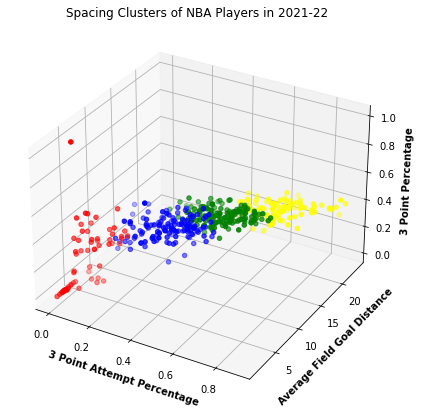

In [1611]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10, 7))
#plt.style.use('dark_background')
ax = plt.axes(projection ="3d")
df1 = num_df[num_df.cluster==0]
df2 = num_df[num_df.cluster==1]
df3 = num_df[num_df.cluster==2]
df4 = num_df[num_df.cluster==3]

ax.scatter3D(df1["3PAPct"], df1["FGDist"], df1["3PPct"], color='green')
ax.scatter3D(df2["3PAPct"], df2["FGDist"], df2["3PPct"], color='red')
ax.scatter3D(df3["3PAPct"], df3["FGDist"], df3["3PPct"], color='blue')
ax.scatter3D(df4["3PAPct"], df4["FGDist"], df4["3PPct"], color='yellow')
ax.set_title('Spacing Clusters of NBA Players in 2021-22')
ax.set_xlabel('3 Point Attempt Percentage', fontweight ='bold')
ax.set_ylabel('Average Field Goal Distance', fontweight ='bold')
ax.set_zlabel('3 Point Percentage', fontweight ='bold')
#plt.savefig('clusters2022.png')

In [1612]:
df_cluster = pd.DataFrame()

df_cluster[["FGDist", "FGPct", "3PPct", "3PAPct", "Cluster"]]= num_df[["FGDist", "FGPct", "3PPct", "3PAPct", "cluster"]].sort_values(by=['cluster'])
df_cluster.head()

,FGDist,FGPct,3PPct,3PAPct,Cluster
Player,,,,,
Kelan Martin,15.4,0.409,0.293,0.439,0
Serge Ibaka,13.8,0.500,0.374,0.334,0
Terence Davis,16.3,0.423,0.329,0.558,0
Dennis Schröder,14.7,0.431,0.344,0.345,0
Admiral Schofield,17.6,0.419,0.329,0.612,0


In [1613]:
df_cluster.sort_values(by=['3PPct'], ascending=False).head()

,FGDist,FGPct,3PPct,3PAPct,Cluster
Player,,,,,
Jakob Poeltl,4.7,0.618,1.000,0.002,1
Anthony Gill,9.2,0.569,0.538,0.239,2
Dwight Howard,4.5,0.612,0.533,0.068,1
Kai Jones,7.7,0.643,0.500,0.143,1
Bruno Fernando,4.0,0.655,0.500,0.036,1


In [1614]:
#pd.DataFrame.to_excel(df_cluster, "SpacingClusters2022.xlsx")

In [1615]:
df_cluster["Cluster"].value_counts()

0    151
2    131
3     96
1     65
Name: Cluster, dtype: int64

In [1616]:
df_cluster[["FGDist", "FGPct", "3PPct", "3PAPct", "Cluster"]].loc[["LeBron James", "Stephen Curry", "Kevin Durant",
        "Seth Curry", "Damian Lillard", "Steven Adams", "Darius Garland", "Luka Dončić", "Joel Embiid", "Nikola Jokić",
       "Devin Booker", "Trae Young", "Ja Morant", "Bradley Beal", "Jimmy Butler", "Kevin Love"]]

,FGDist,FGPct,3PPct,3PAPct,Cluster
Player,,,,,
LeBron James,13.8,0.524,0.359,0.367,0
Stephen Curry,19.8,0.437,0.380,0.613,3
Kevin Durant,15.1,0.518,0.383,0.269,0
Seth Curry,19.4,0.487,0.422,0.506,3
Damian Lillard,17.9,0.402,0.324,0.514,3
Steven Adams,2.9,0.547,0.000,0.003,1
Darius Garland,15.5,0.462,0.383,0.387,0
Luka Dončić,15.9,0.457,0.353,0.406,0
Joel Embiid,11.9,0.499,0.371,0.188,2


In [1617]:
scaler = MinMaxScaler()
scaler.fit(df_cluster[["3PAPct"]])
df_cluster[["3PAPct"]] = scaler.transform(df_cluster[["3PAPct"]])
scaler.fit(df_cluster[["FGDist"]])
df_cluster[["FGDist_Fitted"]] = scaler.transform(df_cluster[["FGDist"]])
scaler.fit(df_cluster[["3PPct"]])
df_cluster[["3PPct"]] = scaler.transform(df_cluster[["3PPct"]])
df_cluster[["FGDist", "FGDist_Fitted", "FGPct", "3PPct", "3PAPct", "Cluster"]].loc[["LeBron James", "Stephen Curry", "Kevin Durant", 
       "Seth Curry", "Damian Lillard", "Steven Adams", "Darius Garland", "Luka Dončić", "Joel Embiid", "Nikola Jokić",
       "Devin Booker", "Trae Young", "Ja Morant", "Bradley Beal", "Jimmy Butler", "Kevin Love"]]

,FGDist,FGDist_Fitted,FGPct,3PPct,3PAPct,Cluster
Player,,,,,,
LeBron James,13.8,0.567568,0.524,0.359,0.412360,0
Stephen Curry,19.8,0.837838,0.437,0.380,0.688764,3
Kevin Durant,15.1,0.626126,0.518,0.383,0.302247,0
Seth Curry,19.4,0.819820,0.487,0.422,0.568539,3
Damian Lillard,17.9,0.752252,0.402,0.324,0.577528,3
Steven Adams,2.9,0.076577,0.547,0.000,0.003371,1
Darius Garland,15.5,0.644144,0.462,0.383,0.434831,0
Luka Dončić,15.9,0.662162,0.457,0.353,0.456180,0
Joel Embiid,11.9,0.481982,0.499,0.371,0.211236,2


<AxesSubplot:>

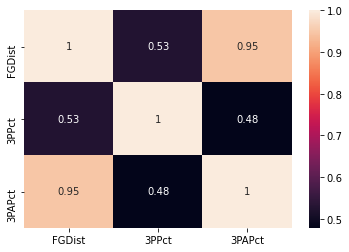

In [1618]:
sns.heatmap(df_cluster[["FGDist", "3PPct", "3PAPct"]].corr(), annot=True)

In [1619]:
averages_df = df_cluster.groupby('Cluster').mean()
averages_df = averages_df.reset_index(drop=False)

In [1620]:
averages_df = averages_df.apply(lambda x: round(x, 3))

In [1621]:
averages_df = averages_df[['Cluster', "FGDist", "FGDist_Fitted", "FGPct", "3PPct", "3PAPct"]]

In [1622]:
averages_df['Cluster'] = averages_df['Cluster'].apply(lambda x: int(x))
averages_df = averages_df.sort_values(by='3PPct', ascending=True)

In [1623]:
averages_df.sort_values(by='3PPct', ascending=True)

,Cluster,FGDist,FGDist_Fitted,FGPct,3PPct,3PAPct
1,1,4.798,0.162,0.595,0.193,0.060
2,2,11.514,0.465,0.474,0.315,0.339
0,0,15.689,0.653,0.432,0.347,0.516
3,3,19.684,0.833,0.403,0.360,0.741


In [1624]:
averages_df['Players'] = df_cluster["Cluster"].value_counts()
averages_df['Spacing Score'] = [0, .5, 1, 1]
averages_df['Level'] = ['Non-Spacer', 'Semi-Spacer', 'Spacer', 'Spacer']
averages_df['3PEff'] = ['Below Average', 'Average', 'Good', 'Great']
averages_df.sort_values('3PPct', ascending=True)

,Cluster,FGDist,FGDist_Fitted,FGPct,3PPct,3PAPct,Players,Spacing Score,Level,3PEff
1,1,4.798,0.162,0.595,0.193,0.060,65,0.0,Non-Spacer,Below Average
2,2,11.514,0.465,0.474,0.315,0.339,131,0.5,Semi-Spacer,Average
0,0,15.689,0.653,0.432,0.347,0.516,151,1.0,Spacer,Good
3,3,19.684,0.833,0.403,0.360,0.741,96,1.0,Spacer,Great


In [1625]:
df_cluster = df_cluster[["FGDist", "FGDist_Fitted", "FGPct", "3PPct", "3PAPct", "Cluster"]]
df_cluster

,FGDist,FGDist_Fitted,FGPct,3PPct,3PAPct,Cluster
Player,,,,,,
Kelan Martin,15.4,0.639640,0.409,0.293,0.493258,0
Serge Ibaka,13.8,0.567568,0.500,0.374,0.375281,0
Terence Davis,16.3,0.680180,0.423,0.329,0.626966,0
Dennis Schröder,14.7,0.608108,0.431,0.344,0.387640,0
Admiral Schofield,17.6,0.738739,0.419,0.329,0.687640,0
...,...,...,...,...,...,...
Jae Crowder,20.8,0.882883,0.399,0.348,0.753933,3
Ty Jerome,18.3,0.770270,0.378,0.290,0.637079,3
Anfernee Simons,19.0,0.801802,0.443,0.405,0.623596,3


In [1626]:
df_cluster.reset_index(inplace=True)
df_cluster

,Player,FGDist,FGDist_Fitted,FGPct,3PPct,3PAPct,Cluster
0,Kelan Martin,15.4,0.639640,0.409,0.293,0.493258,0
1,Serge Ibaka,13.8,0.567568,0.500,0.374,0.375281,0
2,Terence Davis,16.3,0.680180,0.423,0.329,0.626966,0
3,Dennis Schröder,14.7,0.608108,0.431,0.344,0.387640,0
4,Admiral Schofield,17.6,0.738739,0.419,0.329,0.687640,0
...,...,...,...,...,...,...,...
438,Jae Crowder,20.8,0.882883,0.399,0.348,0.753933,3
439,Ty Jerome,18.3,0.770270,0.378,0.290,0.637079,3
440,Anfernee Simons,19.0,0.801802,0.443,0.405,0.623596,3
441,Max Strus,21.1,0.896396,0.441,0.410,0.880899,3


In [1627]:
df_cluster = pd.merge(df_cluster, averages_df[['Cluster', 'Spacing Score', 'Level', '3PEff']], on ='Cluster')
df_cluster

,Player,FGDist,FGDist_Fitted,FGPct,3PPct,3PAPct,Cluster,Spacing Score,Level,3PEff
0,Kelan Martin,15.4,0.639640,0.409,0.293,0.493258,0,1.0,Spacer,Good
1,Serge Ibaka,13.8,0.567568,0.500,0.374,0.375281,0,1.0,Spacer,Good
2,Terence Davis,16.3,0.680180,0.423,0.329,0.626966,0,1.0,Spacer,Good
3,Dennis Schröder,14.7,0.608108,0.431,0.344,0.387640,0,1.0,Spacer,Good
4,Admiral Schofield,17.6,0.738739,0.419,0.329,0.687640,0,1.0,Spacer,Good
...,...,...,...,...,...,...,...,...,...,...
438,Jae Crowder,20.8,0.882883,0.399,0.348,0.753933,3,1.0,Spacer,Great
439,Ty Jerome,18.3,0.770270,0.378,0.290,0.637079,3,1.0,Spacer,Great
440,Anfernee Simons,19.0,0.801802,0.443,0.405,0.623596,3,1.0,Spacer,Great
441,Max Strus,21.1,0.896396,0.441,0.410,0.880899,3,1.0,Spacer,Great


In [1628]:
df_cluster = df_cluster.sort_values(by=['Spacing Score', '3PEff'])
df_cluster

,Player,FGDist,FGDist_Fitted,FGPct,3PPct,3PAPct,Cluster,Spacing Score,Level,3PEff
151,Isaiah Hartenstein,5.9,0.211712,0.626,0.467,0.092135,1,0.0,Non-Spacer,Below Average
152,Willy Hernangómez,4.2,0.135135,0.520,0.333,0.041573,1,0.0,Non-Spacer,Below Average
153,Dwight Howard,4.5,0.148649,0.612,0.533,0.076404,1,0.0,Non-Spacer,Below Average
154,Damian Jones,7.4,0.279279,0.658,0.345,0.122472,1,0.0,Non-Spacer,Below Average
155,Boban Marjanović,7.0,0.261261,0.600,0.250,0.064045,1,0.0,Non-Spacer,Below Average
...,...,...,...,...,...,...,...,...,...,...
438,Jae Crowder,20.8,0.882883,0.399,0.348,0.753933,3,1.0,Spacer,Great
439,Ty Jerome,18.3,0.770270,0.378,0.290,0.637079,3,1.0,Spacer,Great
440,Anfernee Simons,19.0,0.801802,0.443,0.405,0.623596,3,1.0,Spacer,Great
441,Max Strus,21.1,0.896396,0.441,0.410,0.880899,3,1.0,Spacer,Great


In [1629]:
df_cluster = df_cluster.set_index("Player")
df_cluster

,FGDist,FGDist_Fitted,FGPct,3PPct,3PAPct,Cluster,Spacing Score,Level,3PEff
Player,,,,,,,,,
Isaiah Hartenstein,5.9,0.211712,0.626,0.467,0.092135,1,0.0,Non-Spacer,Below Average
Willy Hernangómez,4.2,0.135135,0.520,0.333,0.041573,1,0.0,Non-Spacer,Below Average
Dwight Howard,4.5,0.148649,0.612,0.533,0.076404,1,0.0,Non-Spacer,Below Average
Damian Jones,7.4,0.279279,0.658,0.345,0.122472,1,0.0,Non-Spacer,Below Average
Boban Marjanović,7.0,0.261261,0.600,0.250,0.064045,1,0.0,Non-Spacer,Below Average
...,...,...,...,...,...,...,...,...,...
Jae Crowder,20.8,0.882883,0.399,0.348,0.753933,3,1.0,Spacer,Great
Ty Jerome,18.3,0.770270,0.378,0.290,0.637079,3,1.0,Spacer,Great
Anfernee Simons,19.0,0.801802,0.443,0.405,0.623596,3,1.0,Spacer,Great


In [1631]:
#pd.DataFrame.to_excel(df_cluster, "PlayerSpacingClusters2022.xlsx")